In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')
######################

user_name='mohabu'
# user_name='Mhdella'

In [2]:
import os
import pandas as pd
import numpy as np
import pickle
from datetime import timedelta

In [3]:
import tensorflow as tf
tf.random.set_seed(42)
from numpy.random import seed
seed(0)

In [4]:
# pow_mod_combs=[2,3,4]
pow_mod_combs=[3,4]

# pow_mod_combs=[0,1,2,3,4,5,6,7,8]

# epcs=5
# epcs=25
# epcs=50
epcs=100

# shuff_combs=[0]
shuff_combs=[1]
norm_combs=[1]
# norm_combs=[2]
# shuff_combs=[0,1]
# norm_combs=[0,1,2]

# lyr_combs=[5, 10, 20]
# lyr_combs=[10, 20]
# neo_combs=[50, 100]
lyr_combs=[1,2,3,4,5,10,20]
neo_combs=[10,25,50,75,100]


In [5]:
cross_valid=0; ## no cross validation
# cross_valid=1; ## Run cross validation

In [6]:
# pw_mod_sw=0 ## Using original physical model for crossing-ocean ships
### df['PwMod']=df.speedOverGround_poly3_2+(12.5*df.waveheight_poly3*df.Cos_HWaveP)+(0.5*df.windspeed_poly1_5*df.Cos_HWindP)

# pw_mod_sw=1  ## Using modefied physical model, without constant coefficients such as 12.5, 0.5, to make the model migtht be suitable for short-sea ships
### df['PwMod']=df.speedOverGround_poly3_2+(df.waveheight_poly3*df.Cos_HWaveP)+(df.windspeed_poly1_5*df.Cos_HWindP)

# pw_mod_sw=2  ## Using modefied physical model, separable terms of PwMod in different columns rather than PyMod one column
### PwMod = inputs=['speedOverGround_poly3_2', 'waveheight_poly3' , 'Cos_HWaveP', 'windspeed_poly1_5', 'Cos_HWindP' ] 

# pw_mod_sw=3   ##inputs without PyMod components
###inputs=['speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
###'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff']   
    
# pw_mod_sw=4 ##inputs inlcuding PyMod components
### inputs=['speedOverGround_poly3_2', 'waveheight_poly3' , 'Cos_HWaveP', 'windspeed_poly1_5', 'Cos_HWindP',
### 'speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
### 'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff']  

# pw_mod_sw=5 ### using PwMod as one column with 11 onboard features
### inputs= ['PwMod','speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
###'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff'] 


# ann_sw=0 ##ANN lyrs=3, Neo=25, #epcs=1000, when Pw_mod_sw <=2
####ann_sw=1   ##ANN lyrs=5, Neo=100, #epcs=1000, when Pw_mod_sw <= 2

    

In [7]:
# for kk in range (100):
# Year2020_fg=1 ###Use 2020 data only *to check the accuracy with Phy-Mod which used weather Copernicus 2020 data
Year2020_fg=0  ##Use all data available,  2019, 2020, 2021
##########

Exclud_port_fg=1  ## Excluding ports data
# Exclud_port_fg=0  
##########
windais_fg=1  ##Use wind data in the phy model from wind AIS
# windais_fg=0  ##Use wind data in the phy model from wind Coperniucs
################

Phi_course_fg=0 #Using course deviations *Vessel's course direction with resepect to True North
# Phi_course_fg=1 #using Phi as vessel's direction with respect to vessel's heading
#################
add_diff_fg=0  ##Not adding diff of sog&cog
# add_diff_fg=1  ## adding diff of sog&cog, forward diff = past-present
# add_diff_fg=2  ## adding diff of sog&cog, backword diff = present-past

###########
diff_fg=0  #### not using the input differnces
# diff_fg=1  #### using the input differnces, forward diff = past-present
# diff_fg=2  #### using the input differnces, backword diff = present-past

##########
# sog_kn=1  #covnert sog to knot/hr
sog_kn=0  #Keep sog to m/s
########

max_norm=1  #normalize
# max_norm=2 #standardization, mean=0, std=1
# max_norm=0  #not normalize
################
# diff_drop=1 # drop wind_couse_diff from inputs
diff_drop=0 # Not to drop wind_couse_diff from inputs

################
top_fl_smps=1 #Select the data samples based on best fuel consumption
###top_fl_smps=0

###############
df_dt_fg=1   ####using data 3 that including date as index, this is more faster
# df_dt_fg=0

# df_merg='April' # using April2020 data
# df_merg='April_Oct' # using April and October 2020 data
df_merg='All2020' # using April and October 2020 data

##########
##########
###def training(x_train, y_train, x_valid, y_valid, path, neo,  epcs, shff_fg):
# 
# lyr_no=1  #number of hidden layers 
# lyr_no=2 
# lyr_no=3
# lyr_no=4
# lyr_no=5
# lyr_no=10
# lyr_no=20
#########
outs_no=1  #number of outputs 
# outs_no=2

#########

# shff_fg=0  #Without shuffle
# shff_fg=1  #With shuffle

#########
# neo=5  #number of neurons in every layer of ANN
# neo=10  #number of neurons in every layer of ANN
# neo=25
# neo=50
# neo=100
#########
# epcs=5  #number of epochs
# epcs=10  #number of epochs
# epcs=20  #number of epochs
# epcs=50  #number of epochs
# epcs=100  #number of epochs
# epcs=200  #number of epochs
# epcs=300  #number of epochs
# epcs=500  #number of epochs
# epcs=1000   
# epcs=5000
# epcs=7000
##############

latlon_prs_fg=0;  ## Use the past values for location data (lat, Lon)
#### latlon_prs_fg=1; ## Use the present values for location data (lat, Lon)

#############

past_fg=0; ##past_inputs = inputs   ### wind coruse directions are present measured values
# past_fg=1; ##past_inputs = inputs + ['directionTrue'] + ['courseOverGroundTrue']  ##all past values

##############

loc_fg=0  ##All data
# loc_fg=1  ##dfloc=df_sel[(df_sel['longitude']>=11.6585) & (df_sel['longitude']<=11.675) ]
# loc_fg=2  ##dfloc=df_sel[(df_sel['latitude']>=57.69) & (df_sel['latitude']<=57.71) ]

#################

cruis_fg=0 ## all ferry speed over ground
# cruis_fg=1 ## curising speed over ground
###############

splt_fg=0   #test_size=20%
# splt_fg=1   #test_size=30%
# splt_fg=2   #test_size=40%
###########

# sz_fg=0 #size=1800
# sz_fg=1 #size=10000
# sz_fg=2 #size=100000
sz_fg=3 #size=len(df)

#####################
#####################

# tempo_res='H'  ; dw=0.03
# tempo_res='30min'  ; dw=0.03
# tempo_res='10min'  ; dw=0.015
# tempo_res='5min'  ; dw=0.005
# tempo_res='2min'  ; dw=0.005
tempo_res='1min'  ; dw=0.005
# tempo_res='30S'  ; dw=0.005
# tempo_res='10S'  ; dw=0.005
# tempo_res='1S' ; dw=0.005

###########


# In[3]:


import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.externals import joblib
import joblib
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras import backend as k
import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score, mean_squared_error
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


# In[4]:


import os
import pandas as pd
import numpy as np
import pickle
from datetime import timedelta

from bokeh.plotting import figure
from bokeh.tile_providers import get_provider, Vendors, WIKIMEDIA, CARTODBPOSITRON, STAMEN_TERRAIN, STAMEN_TONER, ESRI_IMAGERY, OSM
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure, ColumnDataSource
from bokeh.palettes import PRGn, RdYlGn
from bokeh.transform import linear_cmap,factor_cmap
from bokeh.layouts import row, column
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter
import matplotlib.pyplot as plt
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")


# In[5]:


# cwd = os.getcwd() 
# # directory = os.path.join("/content/gdrive/MyDrive/Ceta_multi_days")
# directory = os.path.join('C:/+HP Folders/+Folder 2022/ecokit_data_2020_05_22/Processed_data')

# os.chdir(directory)

# # df=pd.read_csv('/content/gdrive/MyDrive/data1.csv')

# # df=pd.read_csv('/content/gdrive/MyDrive/data_v2.csv')

# # df=pd.read_csv('C:/+HP Folders/+Folder 2022/data_v2.csv')

# # df=pd.read_csv('C:/+HP Folders/+Folder 2022/ecokit_data_2020_05_22/Processed_data')

# # df=pd.read_csv('C:/+HP Folders/+Folder 2022/ecokit_data_2020_05_22/Processed_data/Data_File01_04_2020_04_59_49.xlsx')
# os.chdir(cwd) 


# In[6]:


# # df=pd.read_csv('C:/+HP Folders/+Folder 2022/data_v2.csv')
# ####################################################
# df= pd.read_pickle('C:/Users/Mhdella/iHelm/ECO KIT/Data_analysi_final/Processed_Data.pkl')
# ####################################################


# In[7]:


# !pip3 install pickle5
# import pickle5 as pickle


# In[8]:


# # infile = open('/content/gdrive/MyDrive/data_v3_1min.pkl','rb')

# # C:\Users\Mhdella\OneDrive - Högskolan i Halmstad\ECOKIT_MATERIAL
# # df = pickle.load(infile)

# if tempo_res=='1min':
#     df=pd.read_pickle('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad\ECOKIT_MATERIAL/data_v3_1min.pkl')



# In[ ]:


if user_name=='Mhdella':
    df=pd.read_pickle('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad\ECOKIT_MATERIAL/data_v3_1min.pkl')

else:
    cwd = os.getcwd() 
    # directory = os.path.join('C:/+HP Folders/+Folder 2022/ecokit_data_2020_05_22/Processed_data')
    directory = os.path.join('C:/Users/mohabu/data_v3/')


    os.chdir(directory)
    #####################
    ### df=pd.read_csv('C:/+HP Folders/+Folder 2022/data_v2.csv')

    # df= pd.read_pickle('C:/Users/Mhdella/iHelm/ECO KIT/Data_analysi_final/Processed_Data.pkl')
    # df=pd.read_pickle('C:/Users/mohabu/data_v3/data_v3_1min.pkl')

    if (df_dt_fg==0) & (tempo_res!='1min'):
        df=pd.read_pickle('C:/Users/mohabu/data_v3/data_v3.pkl')

    if (df_dt_fg==1) & (tempo_res!='1min'):
        df=pd.read_pickle('C:/Users/mohabu/data_v3/data_v3_incl_cruising.pkl')

    if tempo_res=='1min':
        df=pd.read_pickle('C:/Users/mohabu/data_v3/data_v3_1min.pkl')

#     if tempo_res=='1min':
#         df=pd.read_pickle('C:/Users/mohabu/data_v3/data_v3_1min.pkl')


    os.chdir(cwd) 


# In[ ]:


df.columns


# In[ ]:


df.shape


# In[ ]:


# st=stop


# In[ ]:


if Exclud_port_fg==0:
    df=df
if Exclud_port_fg==1:
    df=df[~(df.speedOverGround<0.5) & ~(df.deltaDistance<0.1)]
df.shape


# In[ ]:


# df.isna().sum()


# In[ ]:


# ##df['dt']=pd.to_datetime((df['timestamp']), format='%Y-%m-%d %H:%M:%S')
# df['dt']=pd.to_datetime((df['timestamp']), format='%y/%m/%d-%H:%M:%S')
# df['date'] = df['dt']
# df = df.set_index(df['date'])
# # df.drop('Unnamed: 0', axis=1, inplace=True)
df=df.resample(tempo_res).mean()
# # df = df.dropna()
# df=df.reset_index()
# df.drop(['date', 'Unnamed: 0'], axis=1, inplace=True)
df.shape


# In[ ]:


if Exclud_port_fg==0:
    df=df
if Exclud_port_fg==1:
    df=df[~(df.speedOverGround<0.5) & ~(df.deltaDistance<0.1)]
df.shape


# In[ ]:


# df.isna().sum()


# In[ ]:


# df.drop('index', axis=1, inplace=True)
# df.timestamp


# In[ ]:


if top_fl_smps==1:
#     df=df[df['engineFuelRate'] < df['engineFuelRate'].mean()]
    df=df[df['engineFuelRate'] >0]

if top_fl_smps==0:
    df=df


# In[ ]:


# mask = (df['timestamp'] >= '2020-01-01') & (df['timestamp'] <= '2020-12-31')
# df=df.loc[mask]

# df.timestamp


# #### Resample the data from 3 Hz to 1sec, 10sec, 1min.

# In[ ]:


df.shape


# In[ ]:


# df.isna().sum()|


# ### Loading Weather data from Copernicus

# In[ ]:


def wind_uv_to_dir(U,V):
    """
    Calculates the wind direction from the u and v component of wind.
    Takes into account the wind direction coordinates is different than the 
    trig unit circle coordinate. If the wind directin is 360 then returns zero
    (by %360)
    Inputs:
      U = west/east direction (wind from the west is positive, from the east is negative)
      V = south/noth direction (wind from the south is positive, from the north is negative)
    """
    WD= (270-np.rad2deg(np.arctan2(V,U)))%360

    return WD

def wind_uv_to_spd(V,U):
    """
    Calculates the wind speed from the u and v wind components
    Inputs:
      U = west/east direction (wind from the west is positive, from the east is negative)
      V = south/noth direction (wind from the south is positive, from the north is negative)
    """
    WS = np.sqrt(np.square(U)+np.square(V))
    return WS


# #### Copernicus Data

# In[ ]:


import xarray as xr

# ds = xr.open_dataset('C:/Users/mohabu/Weather_Cetasol_data/Copernicus_2020.nc')

ds2019 = xr.open_dataset('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/ECOKIT_MATERIAL/Copernicus_2019.nc')



U=ds2019['u10']; V=ds2019['v10'];
ds2019['wind_speed']=wind_uv_to_spd(U,V)
ds2019['wind_direction']=wind_uv_to_dir(U,V)
ds2019


# In[ ]:


ds=ds2019

lati = 57.70; loni = 11.6  # Groto
point = [loni,  lati]


lon = point[0]
lat = point[1]

loni=lon; lati=lat


# date_min='2021-01-01T00:00:00.000000000'; date_max='2021-04-30T23:00:00.000000000'

date_min='2019-11-01T00:00:00.000000000'; date_max='2019-12-31T23:00:00.000000000'

# date_min='2020-04-01T00:00:00.000000000'; date_max='2020-04-24T23:00:00.000000000'

# date_min='2020-01-01T00:00:00.000000000'; date_max='2020-12-31T23:00:00.000000000'



ds_ts=ds.sel(longitude=loni, latitude=lati,method='nearest').sel(time=slice(date_min,date_max))
copernicus_winds=ds_ts



df_copernicus = pd.DataFrame(columns= ['time','windSpeed','windDirection','waveheight', 
                                        'wavedirect','waveperiod','wavedrag_coeff' ])

df_copernicus.time = ds_ts.time.values
df_copernicus.windSpeed=ds_ts.wind_speed.values
df_copernicus.windDirection=ds_ts.wind_direction.values
df_copernicus.waveheight=ds_ts.shww.values
df_copernicus.wavedrag_coeff=ds_ts.cdww.values
df_copernicus.wavedirect=ds_ts.mwd.values
df_copernicus.waveperiod=ds_ts.mwp.values

df_copernicus2019=df_copernicus
df_copernicus2019


# In[ ]:


import xarray as xr

ds2020 = xr.open_dataset('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/ECOKIT_MATERIAL/Copernicus_2020.nc')



U=ds2020['u10']; V=ds2020['v10'];
ds2020['wind_speed']=wind_uv_to_spd(U,V)
ds2020['wind_direction']=wind_uv_to_dir(U,V)
ds2020


# In[ ]:


ds=ds2020

lati = 57.70; loni = 11.6  # Groto
point = [loni,  lati]


lon = point[0]
lat = point[1]

loni=lon; lati=lat


# date_min='2021-01-01T00:00:00.000000000'; date_max='2021-04-30T23:00:00.000000000'

# date_min='2020-03-26T00:00:00.000000000'; date_max='2020-04-24T23:00:00.000000000'

# date_min='2020-04-01T00:00:00.000000000'; date_max='2020-04-24T23:00:00.000000000'

date_min='2020-01-01T00:00:00.000000000'; date_max='2020-12-31T23:00:00.000000000'



ds_ts=ds.sel(longitude=loni, latitude=lati,method='nearest').sel(time=slice(date_min,date_max))
copernicus_winds=ds_ts



df_copernicus = pd.DataFrame(columns= ['time','windSpeed','windDirection','waveheight', 
                                        'wavedirect','waveperiod','wavedrag_coeff' ])

df_copernicus.time = ds_ts.time.values
df_copernicus.windSpeed=ds_ts.wind_speed.values
df_copernicus.windDirection=ds_ts.wind_direction.values
df_copernicus.waveheight=ds_ts.shww.values
df_copernicus.wavedrag_coeff=ds_ts.cdww.values
df_copernicus.wavedirect=ds_ts.mwd.values
df_copernicus.waveperiod=ds_ts.mwp.values

df_copernicus2020=df_copernicus
df_copernicus2020


# In[ ]:


import xarray as xr

ds2021 = xr.open_dataset('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/ECOKIT_MATERIAL/Copernicus_2021_Dec_April.nc')



U=ds2021['u10']; V=ds2021['v10'];
ds2021['wind_speed']=wind_uv_to_spd(U,V)
ds2021['wind_direction']=wind_uv_to_dir(U,V)
ds2021


# In[ ]:





# In[ ]:


ds=ds2021

lati = 57.70; loni = 11.6  # Groto
point = [loni,  lati]


lon = point[0]
lat = point[1]

loni=lon; lati=lat


date_min='2021-01-01T00:00:00.000000000'; date_max='2021-04-30T23:00:00.000000000'

# date_min='2020-03-26T00:00:00.000000000'; date_max='2020-04-24T23:00:00.000000000'

# date_min='2020-04-01T00:00:00.000000000'; date_max='2020-04-24T23:00:00.000000000'

# date_min='2020-01-01T00:00:00.000000000'; date_max='2020-12-31T23:00:00.000000000'



ds_ts=ds.sel(longitude=loni, latitude=lati,method='nearest').sel(time=slice(date_min,date_max))
copernicus_winds=ds_ts



df_copernicus = pd.DataFrame(columns= ['time','windSpeed','windDirection','waveheight', 
                                        'wavedirect','waveperiod','wavedrag_coeff' ])

df_copernicus.time = ds_ts.time.values
df_copernicus.windSpeed=ds_ts.wind_speed.values
df_copernicus.windDirection=ds_ts.wind_direction.values
df_copernicus.waveheight=ds_ts.shww.values
df_copernicus.wavedrag_coeff=ds_ts.cdww.values
df_copernicus.wavedirect=ds_ts.mwd.values
df_copernicus.waveperiod=ds_ts.mwp.values

df_copernicus2021=df_copernicus
df_copernicus2021


# In[ ]:


# # ds=xr.concat([ds2019, ds2020, ds2021], pd.Index([-90, -100], name="new_dim"))

# ds=xr.concat([ds2019, ds2020, ds2021], dim='time')
# ds

df_copernicus=pd.concat([df_copernicus2019, df_copernicus2020, df_copernicus2021], axis=0)
df_copernicus.shape


# In[ ]:


df_copernicus.head()
df_copernicus.tail()


# In[ ]:





# In[ ]:


# df_copernicus
df_copernicus.shape


# In[ ]:


dfsel_cds=df_copernicus
dfsel_cds.index=dfsel_cds['time']

# dfsel_cds = dfsel_cds.set_index(dfsel_cds['time'])

dfsel_cds=dfsel_cds.resample(tempo_res).mean() 

dfsel_cds_filled=dfsel_cds.interpolate(method='linear', limit_direction='forward', axis=0)
dfsel_sg_filled2=dfsel_cds_filled.interpolate(method='linear', limit_direction='backward', axis=0)

dfsel_cds=dfsel_sg_filled2

# dfsel_cds=dfsel_cds.dropna()

df_copernicus=dfsel_cds

df_copernicus


# In[ ]:


time_match2=np.isin(df_copernicus.index, df.index)
time2=df_copernicus.index[time_match2]




# In[ ]:


df_copernicus.columns


# ### Including weather data among the inputs

# In[ ]:


time_match3=np.isin(df_copernicus.index, df.index)
time3=df_copernicus.index[time_match3]

df['windSpeed']=df_copernicus['windSpeed'].loc[time3]
df['windDirection']=df_copernicus['windDirection'].loc[time3]
df['waveheight']=df_copernicus['waveheight'].loc[time3]
df['wavedirect']=df_copernicus['wavedirect'].loc[time3]
df['waveperiod']=df_copernicus['waveperiod'].loc[time3]
df['wavedrag_coeff']=df_copernicus['wavedrag_coeff'].loc[time3]


# In[ ]:


df.shape


# In[ ]:


df[['EngineFuelRate', 'directionTrue']]=df[['engineFuelRate','windDirectionTrue']]


# In[ ]:


# df[['headingMagnetic','courseOverGroundTrue', 'directionTrue']].head()


# In[ ]:


# df[['headingMagnetic','courseOverGroundTrue','angleApparent', 'directionTrue']]=df[['headingMagnetic','courseOverGroundTrue','angleApparent', 'directionTrue']]/np.pi*180

df[['headingMagnetic','courseOverGroundTrue', 'directionTrue']]=df[['headingMagnetic','courseOverGroundTrue', 'directionTrue']]/np.pi*180



if sog_kn==1:
    df['speedOverGround']=df['speedOverGround']*3600/1852  #convert sog from m/s to kt/h
if sog_kn==0:
    df['speedOverGround']= df['speedOverGround']

#### Fuel Cons = 0.2525 × Speed^2 – 1.6307 × Speed   ### fuel_Sp_formula



outputs=['EngineFuelRate']


############################
# inputs=['PwMod']

# inputs=['speedOverGround_poly3_2', 'waveheight_poly3', 'windspeed_poly1_5', 'meanwaveperiod',  
#         'heading_wave', 'Cos_HWaveP', 'Cos_HWindP', 'PwMod', 'wavedrag_coeff',
#         'speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
#         'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff'] 

# inputs=['speedOverGround_poly3_2', 'waveheight_poly3', 'windspeed_poly1_5', 'meanwaveperiod',  
#             'heading_wave', 'Cos_HWaveP', 'Cos_HWindP', 'PwMod', 'wavedrag_coeff',
#             'speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
#             'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff'] ##R2=0.757,Normal_Exclud@ly=5,Ne100ep1000, R2=0.597522,Notnormal@ly=5,Ne100

# inputs=['PwMod',
#             'speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
#             'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff'] ##R2=0.7685,Normal_Exclud@ly=5,Ne100ep1000



if tempo_res=='1min':

    dfw = pd.DataFrame({"Wsp":df['windSpeedOverGround'],
                       "Vb":df['speedOverGround'],
                       "Wdr":df['directionTrue']/180*np.pi,
                       "Bdr":df['courseOverGroundTrue']/180*np.pi})


    dfw['alpha']=dfw.Bdr-dfw.Wdr
    dfw['Adiff']=dfw['alpha']
    dfw['cal_appsp']=np.sqrt(dfw.Wsp**2+dfw.Vb**2+2*dfw.Wsp*dfw.Vb*np.cos(dfw.Adiff))
    dfw['cal_appdr']=np.arccos((dfw.Wsp*np.cos(dfw.Adiff)+dfw.Vb)/(dfw.cal_appsp))


    df['speedApparent']=dfw['cal_appsp']
    df['speedApparent'].max()


# In[ ]:


# df['cos_alpha']=np.cos(dfw.Adiff)
# df['2*cos_alpha']=2*np.cos(dfw.Adiff)

# df['2*W*cos_alpha']=2*df['windSpeedOverGround']*np.cos(dfw.Adiff)
# df['2*V*cos_alpha']=2*df['speedOverGround']*np.cos(dfw.Adiff)


# df['windSpeed_poly2']=df['windSpeedOverGround']*df['windSpeedOverGround']
# df['sog_poly2']=df['speedOverGround']*df['speedOverGround']

# df['speedApparent_poly2']=df['speedApparent']*df['speedApparent']

df['speedOverGround_poly2']=df['speedOverGround']*df['speedOverGround']
df['speedOverGround_poly3']=df['speedOverGround']*df['speedOverGround']*df['speedOverGround']

df['fuel_Sp_formula'] = 0.2525*df['speedOverGround_poly2'] - 1.6307 * df['speedOverGround']  ### fuel_Sp_formula


# ### Fuel Consumption Model
# 
# [Ref.] C3S_D422_Lot1_OSM.2.6_201809_SC2 – Operational Indicators Technical Note
# 
# 
# The fuel consumption model is developed to calculate the power needs and fuel consumption of a
# ship when it sails in the ocean. The model is being developed for several standard ship categories
# w.r.t. maritime operation and dimensions. Further details, background, and input data requirements
# are already defined in:
# C3S_D422Lot1.OSM.2.6(1)_201805_Operational_Indicators_Technical_Note_v1. In the document
# presented here we describe the progress in terms of wave added resistance calculation w.r.t. ship
# speed and heading.
# 2.1 Wave added resistance
# 
# ![image.png](attachment:image.png)

# In[ ]:


df.headingMagnetic.describe()
df.wavedirect.describe()
df.windDirection.describe()
df.directionTrue.describe()


# In[ ]:


# st=stop


# In[ ]:


df['speedOverGround_poly3_2']=df.speedOverGround**3.2
df['waveheight_poly3']=df.waveheight**3
df['windspeed_poly1_5']=df.windSpeedOverGround**1.5
df['meanwaveperiod']=df.waveperiod
df['heading_wave']=(df.headingMagnetic-df.wavedirect)*np.pi/180
if windais_fg==0:
    df['heading_wind']=(df.headingMagnetic-df.windDirection)*np.pi/180
if windais_fg==1:
    df['heading_wind']=(df.headingMagnetic-df.directionTrue)*np.pi/180

df['Cos_HWaveP']=np.cos(df['heading_wave'])+np.pi/df.meanwaveperiod
df['Cos_HWindP']=np.cos(2*df['heading_wind'])+np.pi/(2*df.meanwaveperiod)


# In[ ]:


# if windais_fg==0:
#     df['heading_wind']=(df.windDirection-df.headingMagnetic)*np.pi/180
# if windais_fg==1:
#     df['heading_wind']=(df.directionTrue-df.headingMagnetic)*np.pi/180

# df['Cos_HWaveP']=np.cos(df['heading_wave'])+np.pi/df.meanwaveperiod
# df['Cos_HWindP']=np.cos(2*df['heading_wind'])+np.pi/(2*df.meanwaveperiod)


# In[ ]:

In [8]:
df.shape

(128548, 55)

In [9]:
df_copernicus.shape

(787621, 6)

In [10]:
df.head()

,engineActualPercentTorque,engineSpeed,engineFuelRate,accelPedalPos,engineTripFuel,engineTotalFuelUsed,latitude,longitude,satellites,rateOfTurn,...,speedOverGround_poly3,fuel_Sp_formula,speedOverGround_poly3_2,waveheight_poly3,windspeed_poly1_5,meanwaveperiod,heading_wave,heading_wind,Cos_HWaveP,Cos_HWindP
date,,,,,,,,,,,,,,,,,,,,,
2019-11-29 16:12:00,50.757143,1589.041071,30.187500,70.933333,57630.0,57630.0,57.712001,11.668992,10.0,-0.000421,...,105.823817,-2.064054,144.396162,1.594660,31.646497,4.425992,-4.898450,-5.076528,0.894794,-0.391419
2019-11-29 16:13:00,19.909091,1029.170455,9.350000,31.600000,57630.5,57630.5,57.714367,11.674554,10.0,0.015760,...,62.099136,-2.497968,81.775761,1.591615,27.225312,4.424086,-3.528986,-3.473200,-0.215786,1.143073
2019-11-29 16:14:00,10.833333,806.375000,3.900000,14.800000,57630.5,57630.5,57.714362,11.674708,11.0,-0.005411,...,48.627125,-2.588124,62.999509,1.588573,27.451248,4.422180,-3.409743,-3.421225,-0.253845,1.202854
2019-11-29 16:15:00,7.988636,599.474432,2.219318,0.000000,57630.5,57630.5,57.712663,11.680561,11.0,0.032684,...,19.957643,-2.565466,24.365941,1.585535,23.205271,4.420274,-2.836056,-2.382173,-0.242962,0.407295
2019-11-29 16:17:00,26.500000,1045.687500,14.875000,31.800000,57631.5,57631.5,57.711615,11.683293,11.0,0.019822,...,2.552138,-1.756927,2.716634,1.579470,56.493281,4.416462,0.130264,0.588565,1.702865,0.739245


In [11]:
df.tail()

,engineActualPercentTorque,engineSpeed,engineFuelRate,accelPedalPos,engineTripFuel,engineTotalFuelUsed,latitude,longitude,satellites,rateOfTurn,...,speedOverGround_poly3,fuel_Sp_formula,speedOverGround_poly3_2,waveheight_poly3,windspeed_poly1_5,meanwaveperiod,heading_wave,heading_wind,Cos_HWaveP,Cos_HWindP
date,,,,,,,,,,,,,,,,,,,,,
2021-04-20 12:01:00,21.205644,1094.396155,9.962500,35.708667,158465.5000,158465.50,57.713937,11.674217,9.965,-0.003138,...,57.999926,-2.528858,76.030749,7.235828e-13,5.470795,2.635793,1.536209,0.605461,1.226477,0.948104
2021-04-20 12:02:00,21.262894,1093.972133,10.001542,35.724667,158465.6875,158465.73,57.713170,11.670603,9.195,-0.002647,...,56.424272,-2.540007,73.829573,5.788662e-12,9.239510,2.635475,1.567970,0.691426,1.194867,0.782860
2021-04-20 12:03:00,20.878917,1090.180130,9.785021,35.363333,158466.0000,158466.00,57.712480,11.666977,9.000,-0.003783,...,54.698902,-2.551709,71.423948,1.953674e-11,7.821793,2.635157,1.643104,0.773120,1.119940,0.620645
2021-04-20 12:04:00,16.691516,1007.291019,7.538094,29.417400,158466.0000,158466.00,57.711842,11.663347,9.000,-0.003446,...,52.311526,-2.566962,68.103675,4.630930e-11,5.308269,2.634840,1.568883,0.850015,1.194241,0.467289
2021-04-20 12:05:00,5.496236,640.806147,2.007500,2.604333,158466.0000,158466.00,57.711169,11.660250,9.000,-0.004735,...,19.466194,-2.559481,23.726470,9.044785e-11,4.472587,2.634521,1.510104,0.617424,1.253127,0.925901


In [12]:
tempo_res

'1min'

In [13]:
df_stats=pd.DataFrame([])

dfst_iter=[]; dfst_phy_mod_sw=[]; dfst_inps=[];  dfst_DTsz=[]; 
dfst_inps_list=[]; dfst_outs_list=[];
dfst_MSE_nshf=[]; dfst_RMSE_nshf=[]; dfst_R2_nshf=[]; dfst_MAE_nshf=[]
dfst_MSE_shf=[]; dfst_RMSE_shf=[]; dfst_R2_shf=[]; dfst_MAE_shf=[]
dfst_Neo=[]; dfst_Lyrs=[]; dfst_epcs=[]
dfst_shff=[]; dfst_norm=[]
kk=0


lat and lon in past values
Epoch 1/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1351 - r2_keras: 0.2157 - val_loss: 0.1303 - val_r2_keras: 0.2791
Epoch 2/100
1607/1607 [==============================] - 2s 1ms/step - loss: 0.1301 - r2_keras: 0.2837 - val_loss: 0.1284 - val_r2_keras: 0.2995
Epoch 3/100
1607/1607 [==============================] - 2s 2ms/step - loss: 0.1265 - r2_keras: 0.3225 - val_loss: 0.1232 - val_r2_keras: 0.3537
Epoch 4/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1203 - r2_keras: 0.3864 - val_loss: 0.1172 - val_r2_keras: 0.4135
Epoch 5/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1164 - r2_keras: 0.4225 - val_loss: 0.1160 - val_r2_keras: 0.4258
Epoch 6/100
1607/1607 [==============================] - 2s 2ms/step - loss: 0.1156 - r2_keras: 0.4330 - val_loss: 0.1150 - val_r2_keras: 0.4334
Epoch 7/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1155 - r2_keras: 0.4315 

Epoch 57/100
1607/1607 [==============================] - 2s 1ms/step - loss: 0.1109 - r2_keras: 0.4744 - val_loss: 0.1112 - val_r2_keras: 0.4692
Epoch 58/100
1607/1607 [==============================] - 2s 1ms/step - loss: 0.1109 - r2_keras: 0.4743 - val_loss: 0.1111 - val_r2_keras: 0.4695
Epoch 59/100
1607/1607 [==============================] - 2s 1ms/step - loss: 0.1109 - r2_keras: 0.4751 - val_loss: 0.1117 - val_r2_keras: 0.4634
Epoch 60/100
1607/1607 [==============================] - 2s 1ms/step - loss: 0.1108 - r2_keras: 0.4773 - val_loss: 0.1112 - val_r2_keras: 0.4689
Epoch 61/100
1607/1607 [==============================] - 2s 1ms/step - loss: 0.1108 - r2_keras: 0.4762 - val_loss: 0.1111 - val_r2_keras: 0.4693
Epoch 62/100
1607/1607 [==============================] - 2s 1ms/step - loss: 0.1108 - r2_keras: 0.4769 - val_loss: 0.1112 - val_r2_keras: 0.4694
Epoch 63/100
1607/1607 [==============================] - 2s 2ms/step - loss: 0.1108 - r2_keras: 0.4772 - val_loss: 0.1114 -

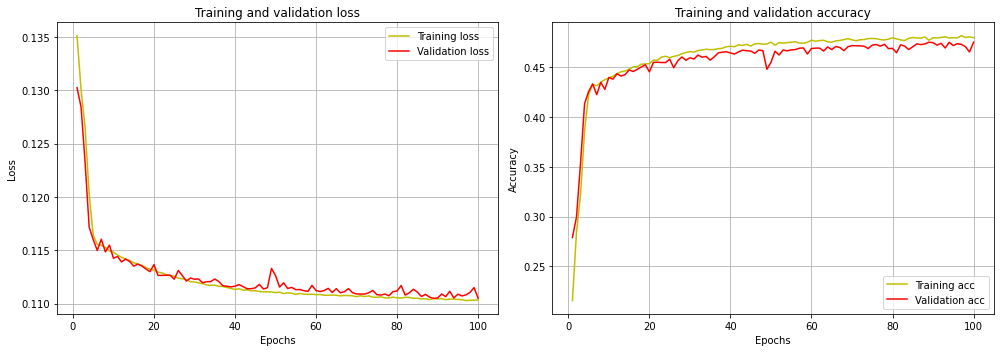

Epoch 1/100
1607/1607 [==============================] - 3s 1ms/step - loss: 0.1328 - r2_keras: 0.2518 - val_loss: 0.1298 - val_r2_keras: 0.2855
Epoch 2/100
1607/1607 [==============================] - 2s 1ms/step - loss: 0.1291 - r2_keras: 0.2938 - val_loss: 0.1266 - val_r2_keras: 0.3190
Epoch 3/100
1607/1607 [==============================] - 2s 1ms/step - loss: 0.1244 - r2_keras: 0.3441 - val_loss: 0.1217 - val_r2_keras: 0.3694
Epoch 4/100
1607/1607 [==============================] - 2s 1ms/step - loss: 0.1183 - r2_keras: 0.4065 - val_loss: 0.1156 - val_r2_keras: 0.4280
Epoch 5/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1156 - r2_keras: 0.4300 - val_loss: 0.1159 - val_r2_keras: 0.4274
Epoch 6/100
1607/1607 [==============================] - 2s 1ms/step - loss: 0.1151 - r2_keras: 0.4373 - val_loss: 0.1152 - val_r2_keras: 0.4307
Epoch 7/100
1607/1607 [==============================] - 2s 1ms/step - loss: 0.1151 - r2_keras: 0.4348 - val_loss: 0.1144 - val_r2

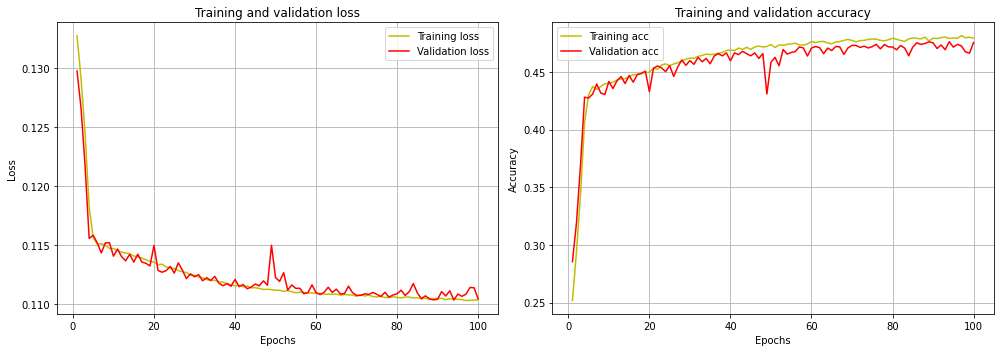

Epoch 1/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1325 - r2_keras: 0.2552 - val_loss: 0.1302 - val_r2_keras: 0.2807
Epoch 2/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1300 - r2_keras: 0.2837 - val_loss: 0.1282 - val_r2_keras: 0.3017
Epoch 3/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1261 - r2_keras: 0.3272 - val_loss: 0.1236 - val_r2_keras: 0.3498
Epoch 4/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1195 - r2_keras: 0.3937 - val_loss: 0.1169 - val_r2_keras: 0.4146
Epoch 5/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1163 - r2_keras: 0.4239 - val_loss: 0.1161 - val_r2_keras: 0.4256
Epoch 6/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1156 - r2_keras: 0.4328 - val_loss: 0.1158 - val_r2_keras: 0.4254
Epoch 7/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1156 - r2_keras: 0.4306 - val_loss: 0.1149 - val_r2

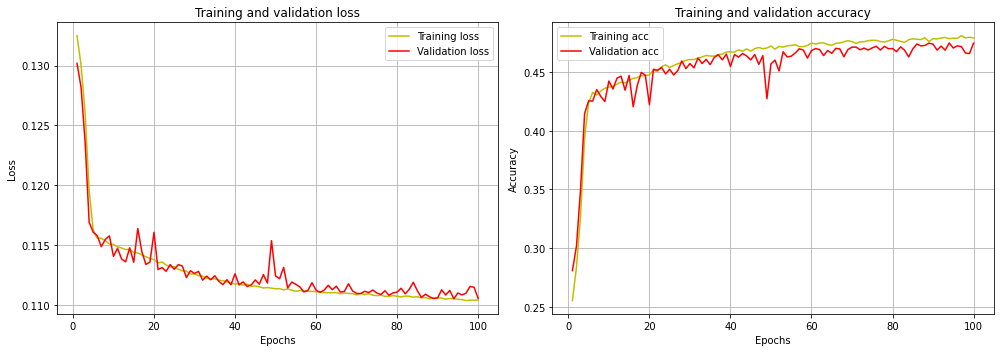

Epoch 1/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1332 - r2_keras: 0.2444 - val_loss: 0.1307 - val_r2_keras: 0.2758
Epoch 2/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1306 - r2_keras: 0.2772 - val_loss: 0.1294 - val_r2_keras: 0.2885
Epoch 3/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1281 - r2_keras: 0.3059 - val_loss: 0.1267 - val_r2_keras: 0.3174
Epoch 4/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1224 - r2_keras: 0.3641 - val_loss: 0.1195 - val_r2_keras: 0.3881
Epoch 5/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1174 - r2_keras: 0.4130 - val_loss: 0.1160 - val_r2_keras: 0.4263
Epoch 6/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1161 - r2_keras: 0.4274 - val_loss: 0.1165 - val_r2_keras: 0.4178
Epoch 7/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1160 - r2_keras: 0.4259 - val_loss: 0.1159 - val_r2

Epoch 57/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1113 - r2_keras: 0.4710 - val_loss: 0.1111 - val_r2_keras: 0.4701
Epoch 58/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1112 - r2_keras: 0.4710 - val_loss: 0.1112 - val_r2_keras: 0.4690
Epoch 59/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1112 - r2_keras: 0.4722 - val_loss: 0.1118 - val_r2_keras: 0.4625
Epoch 60/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1111 - r2_keras: 0.4744 - val_loss: 0.1111 - val_r2_keras: 0.4691
Epoch 61/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1111 - r2_keras: 0.4736 - val_loss: 0.1110 - val_r2_keras: 0.4710
Epoch 62/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1110 - r2_keras: 0.4746 - val_loss: 0.1111 - val_r2_keras: 0.4702
Epoch 63/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1110 - r2_keras: 0.4746 - val_loss: 0.1117 -

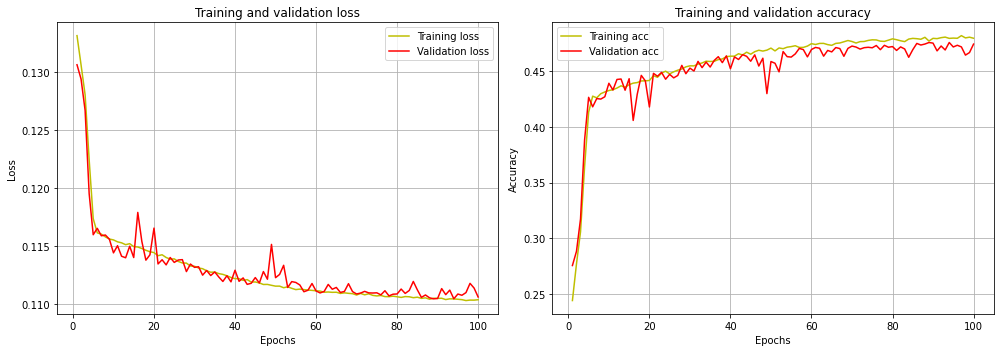

Epoch 1/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1321 - r2_keras: 0.2607 - val_loss: 0.1308 - val_r2_keras: 0.2734
Epoch 2/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1307 - r2_keras: 0.2763 - val_loss: 0.1300 - val_r2_keras: 0.2817
Epoch 3/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1287 - r2_keras: 0.2993 - val_loss: 0.1275 - val_r2_keras: 0.3090
Epoch 4/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1239 - r2_keras: 0.3489 - val_loss: 0.1213 - val_r2_keras: 0.3699
Epoch 5/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1184 - r2_keras: 0.4031 - val_loss: 0.1162 - val_r2_keras: 0.4237
Epoch 6/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1165 - r2_keras: 0.4237 - val_loss: 0.1169 - val_r2_keras: 0.4146
Epoch 7/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1163 - r2_keras: 0.4235 - val_loss: 0.1158 - val_r2

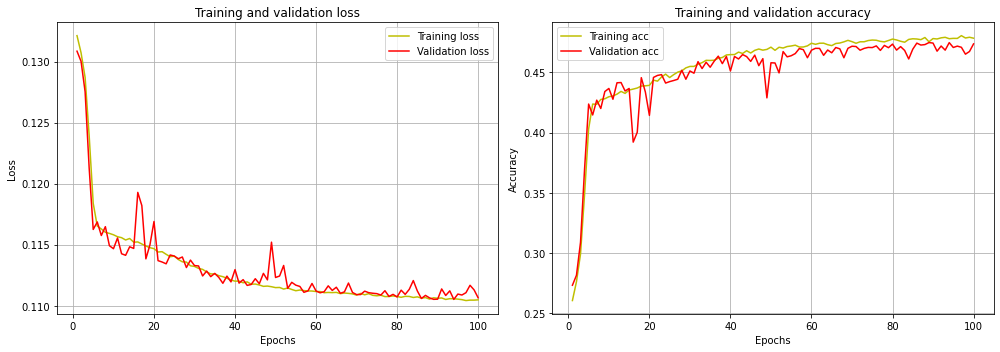

Epoch 1/100
1607/1607 [==============================] - 7s 3ms/step - loss: 0.1364 - r2_keras: 0.2037 - val_loss: 0.1317 - val_r2_keras: 0.2645
Epoch 2/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1317 - r2_keras: 0.2658 - val_loss: 0.1308 - val_r2_keras: 0.2738
Epoch 3/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1308 - r2_keras: 0.2767 - val_loss: 0.1298 - val_r2_keras: 0.2834
Epoch 4/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1269 - r2_keras: 0.3174 - val_loss: 0.1199 - val_r2_keras: 0.3860
Epoch 5/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1151 - r2_keras: 0.4350 - val_loss: 0.1134 - val_r2_keras: 0.4479
Epoch 6/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1131 - r2_keras: 0.4557 - val_loss: 0.1126 - val_r2_keras: 0.4543
Epoch 7/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1129 - r2_keras: 0.4557 - val_loss: 0.1136 - val_r2

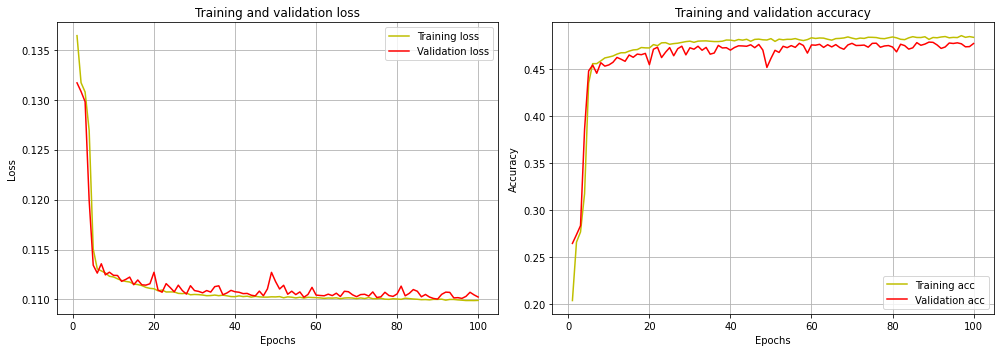

Epoch 1/100
1607/1607 [==============================] - 6s 3ms/step - loss: 0.1322 - r2_keras: 0.2571 - val_loss: 0.1279 - val_r2_keras: 0.3037
Epoch 2/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1176 - r2_keras: 0.4109 - val_loss: 0.1141 - val_r2_keras: 0.4406
Epoch 3/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1144 - r2_keras: 0.4436 - val_loss: 0.1146 - val_r2_keras: 0.4375
Epoch 4/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1138 - r2_keras: 0.4487 - val_loss: 0.1129 - val_r2_keras: 0.4510
Epoch 5/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1130 - r2_keras: 0.4545 - val_loss: 0.1133 - val_r2_keras: 0.4498
Epoch 6/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1124 - r2_keras: 0.4621 - val_loss: 0.1121 - val_r2_keras: 0.4586
Epoch 7/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1122 - r2_keras: 0.4623 - val_loss: 0.1126 - val_r2

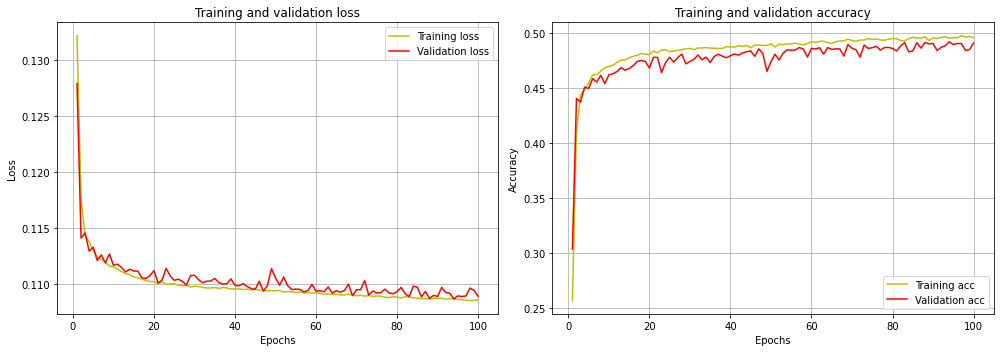

Epoch 1/100
1607/1607 [==============================] - 6s 3ms/step - loss: 0.1302 - r2_keras: 0.2802 - val_loss: 0.1165 - val_r2_keras: 0.4190
Epoch 2/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1154 - r2_keras: 0.4328 - val_loss: 0.1138 - val_r2_keras: 0.4443
Epoch 3/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1137 - r2_keras: 0.4495 - val_loss: 0.1140 - val_r2_keras: 0.4431
Epoch 4/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1127 - r2_keras: 0.4586 - val_loss: 0.1121 - val_r2_keras: 0.4597
Epoch 5/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1120 - r2_keras: 0.4632 - val_loss: 0.1120 - val_r2_keras: 0.4615
Epoch 6/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1117 - r2_keras: 0.4685 - val_loss: 0.1112 - val_r2_keras: 0.4672
Epoch 7/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1115 - r2_keras: 0.4687 - val_loss: 0.1125 - val_r2

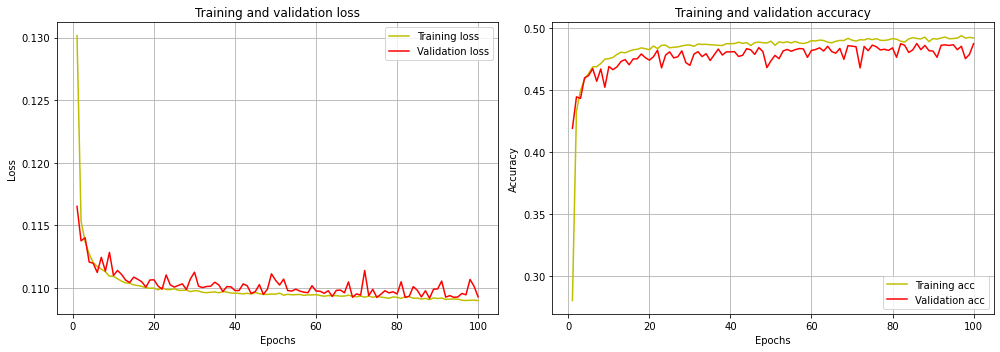

Epoch 1/100
1607/1607 [==============================] - 7s 3ms/step - loss: 0.1293 - r2_keras: 0.2887 - val_loss: 0.1166 - val_r2_keras: 0.4178
Epoch 2/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1151 - r2_keras: 0.4351 - val_loss: 0.1140 - val_r2_keras: 0.4421
Epoch 3/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1134 - r2_keras: 0.4519 - val_loss: 0.1144 - val_r2_keras: 0.4398
Epoch 4/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1125 - r2_keras: 0.4608 - val_loss: 0.1122 - val_r2_keras: 0.4586
Epoch 5/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1118 - r2_keras: 0.4656 - val_loss: 0.1118 - val_r2_keras: 0.4633
Epoch 6/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1114 - r2_keras: 0.4714 - val_loss: 0.1107 - val_r2_keras: 0.4716
Epoch 7/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1111 - r2_keras: 0.4722 - val_loss: 0.1120 - val_r2

Epoch 57/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1094 - r2_keras: 0.4881 - val_loss: 0.1096 - val_r2_keras: 0.4841eras: 0.
Epoch 58/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1094 - r2_keras: 0.4878 - val_loss: 0.1095 - val_r2_keras: 0.4848
Epoch 59/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1094 - r2_keras: 0.4886 - val_loss: 0.1098 - val_r2_keras: 0.4800
Epoch 60/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1094 - r2_keras: 0.4901 - val_loss: 0.1098 - val_r2_keras: 0.4823
Epoch 61/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1094 - r2_keras: 0.4897 - val_loss: 0.1097 - val_r2_keras: 0.4831
Epoch 62/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1093 - r2_keras: 0.4905 - val_loss: 0.1097 - val_r2_keras: 0.4836
Epoch 63/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1094 - r2_keras: 0.4901 - val_loss: 

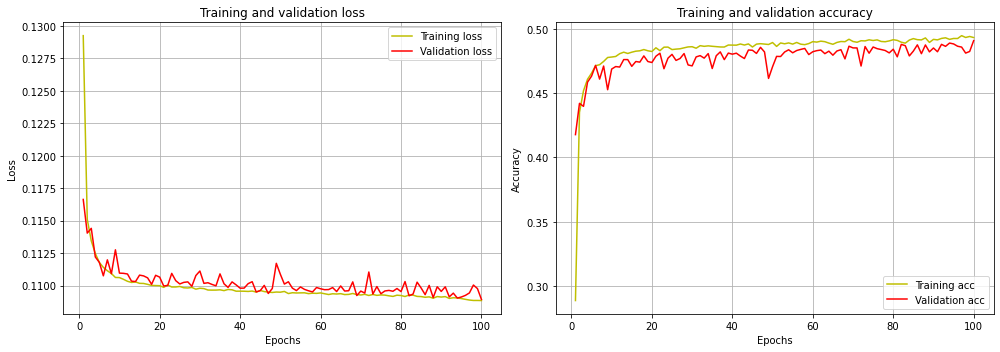

Epoch 1/100
1607/1607 [==============================] - 6s 3ms/step - loss: 0.1278 - r2_keras: 0.3041 - val_loss: 0.1147 - val_r2_keras: 0.4363
Epoch 2/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1146 - r2_keras: 0.4396 - val_loss: 0.1139 - val_r2_keras: 0.4433
Epoch 3/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1131 - r2_keras: 0.4550 - val_loss: 0.1147 - val_r2_keras: 0.4371
Epoch 4/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1124 - r2_keras: 0.4612 - val_loss: 0.1121 - val_r2_keras: 0.4595
Epoch 5/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1120 - r2_keras: 0.4633 - val_loss: 0.1120 - val_r2_keras: 0.4611
Epoch 6/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1117 - r2_keras: 0.4685 - val_loss: 0.1112 - val_r2_keras: 0.4671
Epoch 7/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1116 - r2_keras: 0.4681 - val_loss: 0.1127 - val_r2

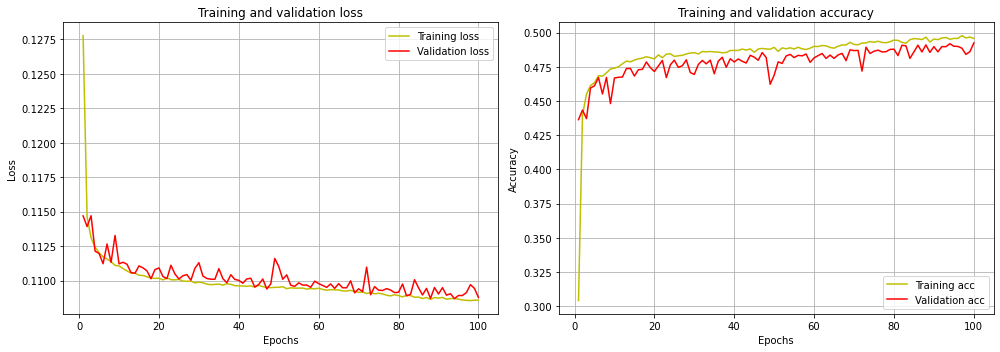

Epoch 1/100
1607/1607 [==============================] - 6s 3ms/step - loss: 0.1350 - r2_keras: 0.2219 - val_loss: 0.1305 - val_r2_keras: 0.2773
Epoch 2/100
1607/1607 [==============================] - ETA: 0s - loss: 0.1261 - r2_keras: 0.32 - 3s 2ms/step - loss: 0.1260 - r2_keras: 0.3246 - val_loss: 0.1134 - val_r2_keras: 0.4468
Epoch 3/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1130 - r2_keras: 0.4560 - val_loss: 0.1128 - val_r2_keras: 0.4521
Epoch 4/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1126 - r2_keras: 0.4592 - val_loss: 0.1123 - val_r2_keras: 0.4572
Epoch 5/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1122 - r2_keras: 0.4613 - val_loss: 0.1126 - val_r2_keras: 0.4549
Epoch 6/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1121 - r2_keras: 0.4652 - val_loss: 0.1119 - val_r2_keras: 0.4610
Epoch 7/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1120 - r2

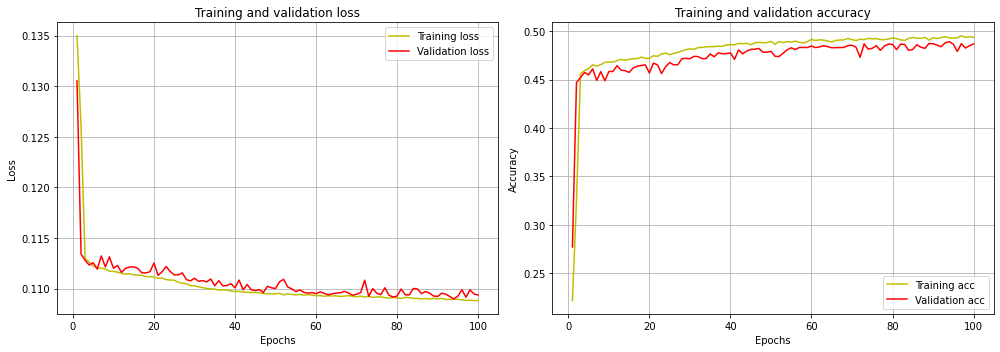

Epoch 1/100
1607/1607 [==============================] - 6s 3ms/step - loss: 0.1309 - r2_keras: 0.2693 - val_loss: 0.1167 - val_r2_keras: 0.4171
Epoch 2/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1142 - r2_keras: 0.4441 - val_loss: 0.1127 - val_r2_keras: 0.4541
Epoch 3/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1128 - r2_keras: 0.4577 - val_loss: 0.1136 - val_r2_keras: 0.4461
Epoch 4/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1125 - r2_keras: 0.4609 - val_loss: 0.1124 - val_r2_keras: 0.4576
Epoch 5/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1120 - r2_keras: 0.4635 - val_loss: 0.1125 - val_r2_keras: 0.4575
Epoch 6/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1115 - r2_keras: 0.4703 - val_loss: 0.1110 - val_r2_keras: 0.4698
Epoch 7/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1112 - r2_keras: 0.4718 - val_loss: 0.1125 - val_r2

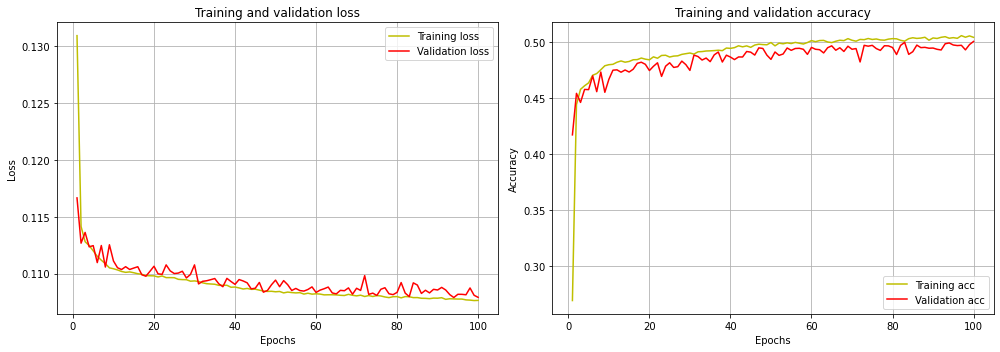

Epoch 1/100
1607/1607 [==============================] - 7s 3ms/step - loss: 0.1223 - r2_keras: 0.3602 - val_loss: 0.1142 - val_r2_keras: 0.4424
Epoch 2/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1130 - r2_keras: 0.4549 - val_loss: 0.1140 - val_r2_keras: 0.4445
Epoch 3/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1120 - r2_keras: 0.4649 - val_loss: 0.1149 - val_r2_keras: 0.4373 0.1120 - r2_keras: 0.46
Epoch 4/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1115 - r2_keras: 0.4703 - val_loss: 0.1109 - val_r2_keras: 0.4712
Epoch 5/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1112 - r2_keras: 0.4707 - val_loss: 0.1122 - val_r2_keras: 0.45760s - loss: 0.1113 - r2_keras: 0.
Epoch 6/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1110 - r2_keras: 0.4749 - val_loss: 0.1107 - val_r2_keras: 0.4717
Epoch 7/100
1607/1607 [==============================] - ETA: 0s - loss: 0

1607/1607 [==============================] - 5s 3ms/step - loss: 0.1078 - r2_keras: 0.5029 - val_loss: 0.1080 - val_r2_keras: 0.5001
epochs= 100
shff_fg= 1
Norm_fg= 1
lyr_no= 3
neo= 50
 MSE_ANN_nshf: 0.008728
 RMSE_ANN_nshf: 0.093426
Normalized RMSE_ANN_nshf: 0.103498
R2_ANN_nshf: 0.522739
MAE_nshf: 0.074421
 MSE_ANN_shf: 0.011911
 RMSE_ANN_shf: 0.109136
Normalized RMSE_ANN_shf: 0.109603
R2_ANN_shf: 0.515758
MAE_shf: 0.080990


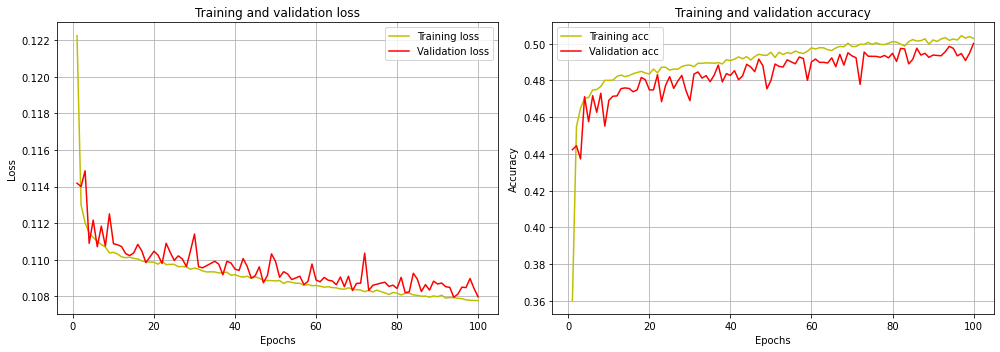

Epoch 1/100
1607/1607 [==============================] - 7s 4ms/step - loss: 0.1211 - r2_keras: 0.3734 - val_loss: 0.1154 - val_r2_keras: 0.4318 - loss: 0.1237 - r2_ker - ETA: 1s - loss: 0.1229 - r2_keras - ETA: 1s - loss: 0.1227 - r2_k - ETA: 0s
Epoch 2/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1136 - r2_keras: 0.4495 - val_loss: 0.1146 - val_r2_keras: 0.4392oss: 0.1136 - r2_k - ETA: 1s - loss: - ETA: 0s - loss: 0.1135 - 
Epoch 3/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1125 - r2_keras: 0.4601 - val_loss: 0.1131 - val_r2_keras: 0.4529
Epoch 4/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1118 - r2_keras: 0.4668 - val_loss: 0.1114 - val_r2_keras: 0.4666
Epoch 5/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1116 - r2_keras: 0.4674 - val_loss: 0.1142 - val_r2_keras: 0.4365: 2s - loss: 0.1111  - ETA: 2s - loss: 0.1116 - r2_ker - ETA: 2s - - ETA: 1s - loss: 0.1113  - ETA
Epoch 6/100

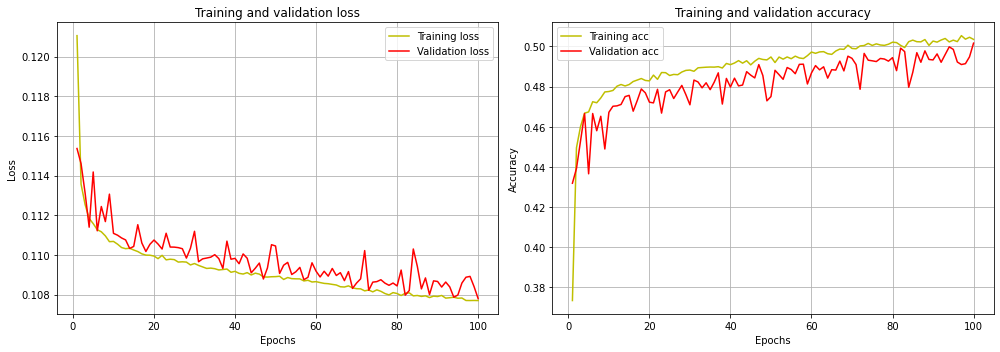

Epoch 1/100
1607/1607 [==============================] - 7s 3ms/step - loss: 0.1199 - r2_keras: 0.3854 - val_loss: 0.1149 - val_r2_keras: 0.4361
Epoch 2/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1135 - r2_keras: 0.4505 - val_loss: 0.1144 - val_r2_keras: 0.44151s - loss:
Epoch 3/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1124 - r2_keras: 0.4615 - val_loss: 0.1129 - val_r2_keras: 0.4554
Epoch 4/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1118 - r2_keras: 0.4667 - val_loss: 0.1113 - val_r2_keras: 0.4687
Epoch 5/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1116 - r2_keras: 0.4669 - val_loss: 0.1144 - val_r2_keras: 0.4336
Epoch 6/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1114 - r2_keras: 0.4714 - val_loss: 0.1111 - val_r2_keras: 0.4678
Epoch 7/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1114 - r2_keras: 0.4702 - val_loss: 0.112

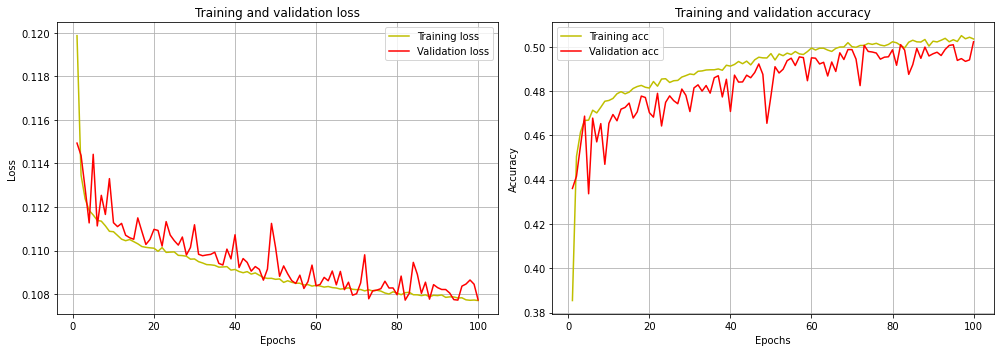

Epoch 1/100
1607/1607 [==============================] - 7s 3ms/step - loss: 0.1305 - r2_keras: 0.2677 - val_loss: 0.1146 - val_r2_keras: 0.4359
Epoch 2/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1137 - r2_keras: 0.4485 - val_loss: 0.1129 - val_r2_keras: 0.4507
Epoch 3/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1128 - r2_keras: 0.4578 - val_loss: 0.1130 - val_r2_keras: 0.4505
Epoch 4/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1126 - r2_keras: 0.4599 - val_loss: 0.1121 - val_r2_keras: 0.4595
Epoch 5/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1121 - r2_keras: 0.4620 - val_loss: 0.1127 - val_r2_keras: 0.4540
Epoch 6/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1120 - r2_keras: 0.4661 - val_loss: 0.1116 - val_r2_keras: 0.4640
Epoch 7/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1118 - r2_keras: 0.4655 - val_loss: 0.1132 - val_r2

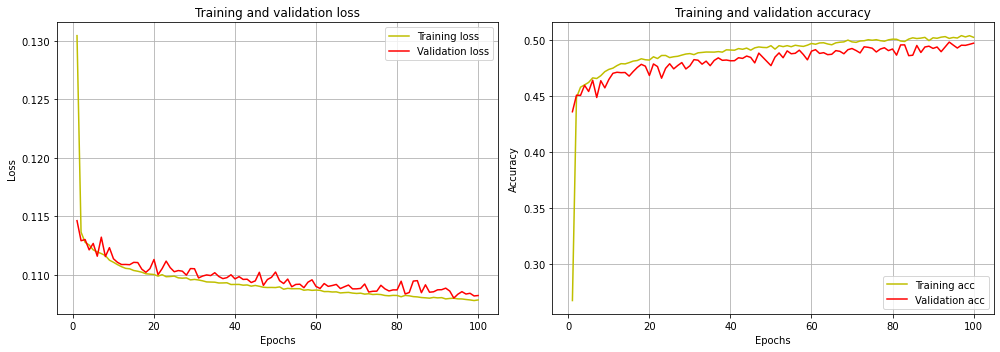

Epoch 1/100
1607/1607 [==============================] - 7s 3ms/step - loss: 0.1222 - r2_keras: 0.3587 - val_loss: 0.1139 - val_r2_keras: 0.44400s - los
Epoch 2/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1127 - r2_keras: 0.4574 - val_loss: 0.1135 - val_r2_keras: 0.4484
Epoch 3/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1121 - r2_keras: 0.4645 - val_loss: 0.1144 - val_r2_keras: 0.4410
Epoch 4/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1115 - r2_keras: 0.4700 - val_loss: 0.1111 - val_r2_keras: 0.4693
Epoch 5/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1111 - r2_keras: 0.4717 - val_loss: 0.1116 - val_r2_keras: 0.4628
Epoch 6/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1109 - r2_keras: 0.4758 - val_loss: 0.1104 - val_r2_keras: 0.4744
Epoch 7/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1108 - r2_keras: 0.4755 - val_loss: 0.1124 

Epoch 57/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1082 - r2_keras: 0.4989 - val_loss: 0.1082 - val_r2_keras: 0.4968
Epoch 58/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1082 - r2_keras: 0.4984 - val_loss: 0.1085 - val_r2_keras: 0.4959
Epoch 59/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1082 - r2_keras: 0.4998 - val_loss: 0.1093 - val_r2_keras: 0.4848
Epoch 60/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1082 - r2_keras: 0.5015 - val_loss: 0.1086 - val_r2_keras: 0.4936
Epoch 61/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1081 - r2_keras: 0.5010 - val_loss: 0.1084 - val_r2_keras: 0.49550s
Epoch 62/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1080 - r2_keras: 0.5021 - val_loss: 0.1088 - val_r2_keras: 0.4922
Epoch 63/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1080 - r2_keras: 0.5024 - val_loss: 0.1086

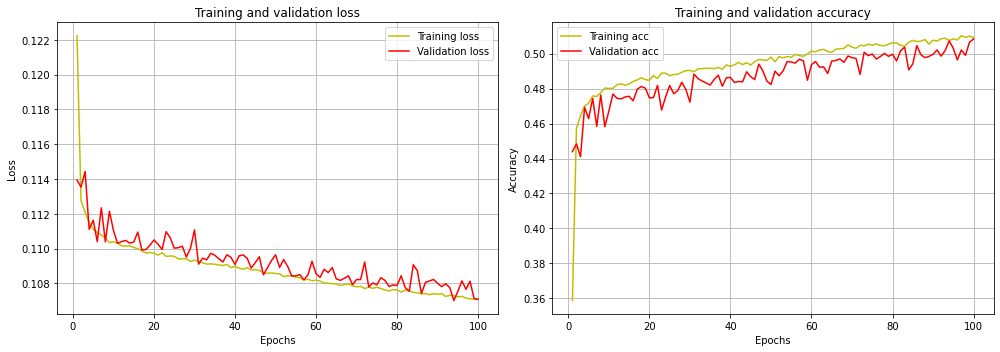

Epoch 1/100
1607/1607 [==============================] - 8s 4ms/step - loss: 0.1200 - r2_keras: 0.3833 - val_loss: 0.1141 - val_r2_keras: 0.4438
Epoch 2/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1128 - r2_keras: 0.4566 - val_loss: 0.1150 - val_r2_keras: 0.4364as - ETA: 2s - loss: 0.1134 - r2_ker - ETA: 2s - loss: 0.1131 - r2_k - ETA: 2s - - ETA: 1s - loss: 0.1 - ETA: 0s - loss: 0.1128 - r2 - ETA: 0s - loss: 0.1127 - r2
Epoch 3/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1121 - r2_keras: 0.4642 - val_loss: 0.1127 - val_r2_keras: 0.4575
Epoch 4/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1116 - r2_keras: 0.4692 - val_loss: 0.1108 - val_r2_keras: 0.47374 - r2 - ETA: 2s - loss: 0 - ETA: 1s - loss: 0.1110 - r2_keras - ETA: 0s - loss: 0.1112 - r2_keras: 0.47 - ETA: 0s -
Epoch 5/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1114 - r2_keras: 0.4690 - val_loss: 0.1146 - val_r2_keras: 0.43

1607/1607 [==============================] - 5s 3ms/step - loss: 0.1071 - r2_keras: 0.5101 - val_loss: 0.1079 - val_r2_keras: 0.4995 loss: 0.1069 - r2_k - ETA: 
Epoch 93/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1071 - r2_keras: 0.5103 - val_loss: 0.1073 - val_r2_keras: 0.5059
Epoch 94/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1071 - r2_keras: 0.5091 - val_loss: 0.1068 - val_r2_keras: 0.50950 - r2_k - ETA: 0s - loss: 0.1071 - r2_keras:  - ETA: 0s - loss: 0.1071 - r2_keras:  - ETA: 0s - loss: 0.1071 - r2_keras: 0.50 - ETA: 0s - loss: 0.1071 - r2
Epoch 95/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1071 - r2_keras: 0.5096 - val_loss: 0.1073 - val_r2_keras: 0.5054
Epoch 96/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1071 - r2_keras: 0.5091 - val_loss: 0.1079 - val_r2_keras: 0.4988
Epoch 97/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1070 - r2_keras: 0.

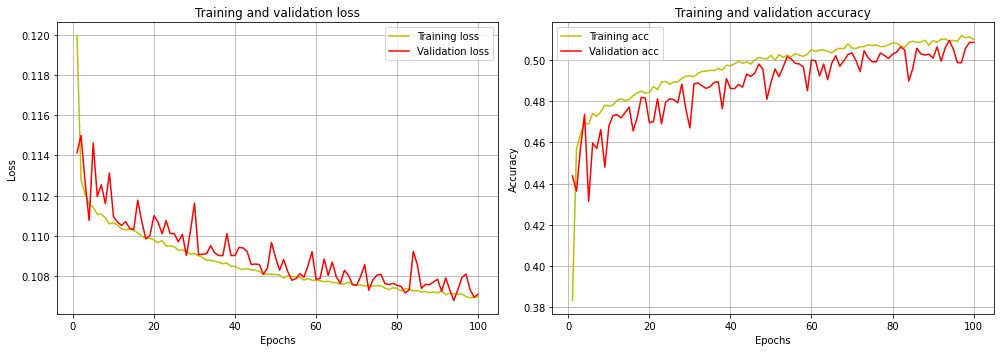

Epoch 1/100
1607/1607 [==============================] - 9s 4ms/step - loss: 0.1198 - r2_keras: 0.3842 - val_loss: 0.1144 - val_r2_keras: 0.4405oss: 0 - E - ETA: 0s
Epoch 2/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1136 - r2_keras: 0.4489 - val_loss: 0.1142 - val_r2_keras: 0.4437eras - ETA: 2s - loss: 0.1137 - r2_keras: 0.44 - ETA: 2s - - ETA: 1s - loss: 0.1135  - ETA: 0s - - ETA: 0s - loss: 0.1136 - r2_keras: 
Epoch 3/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1128 - r2_keras: 0.4576 - val_loss: 0.1125 - val_r2_keras: 0.4576134 - r2_keras - ETA:  - E
Epoch 4/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1122 - r2_keras: 0.4638 - val_loss: 0.1121 - val_r2_keras: 0.4622oss: 0.1118 - r2_keras - ETA: 0s - loss:
Epoch 5/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1119 - r2_keras: 0.4647 - val_loss: 0.1154 - val_r2_keras: 0.4239: 2s - - ETA: 1s - loss: 0.1116 - r2_keras - ETA: 1s - l

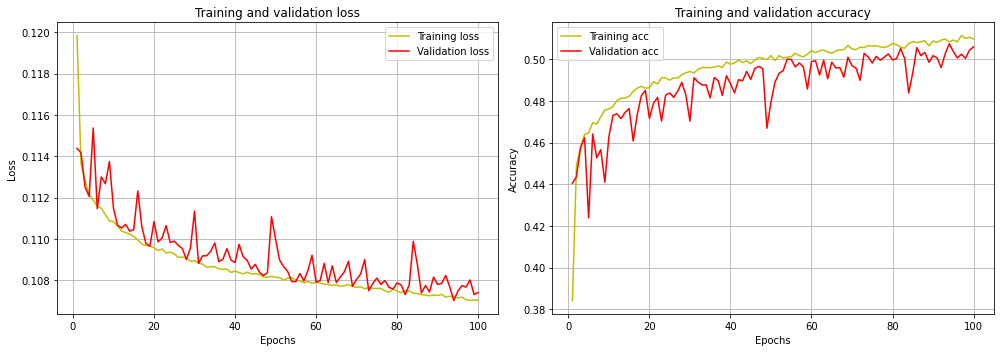

Epoch 1/100
1607/1607 [==============================] - 8s 4ms/step - loss: 0.1193 - r2_keras: 0.3889 - val_loss: 0.1137 - val_r2_keras: 0.4470
Epoch 2/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1138 - r2_keras: 0.4473 - val_loss: 0.1123 - val_r2_keras: 0.4600
Epoch 3/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1127 - r2_keras: 0.4590 - val_loss: 0.1122 - val_r2_keras: 0.4606
Epoch 4/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1121 - r2_keras: 0.4643 - val_loss: 0.1123 - val_r2_keras: 0.4603
Epoch 5/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1118 - r2_keras: 0.4653 - val_loss: 0.1152 - val_r2_keras: 0.4258
Epoch 6/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1114 - r2_keras: 0.4713 - val_loss: 0.1120 - val_r2_keras: 0.4596
Epoch 7/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1113 - r2_keras: 0.4708 - val_loss: 0.1124 - val_r2

Epoch 57/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1079 - r2_keras: 0.5015 - val_loss: 0.1077 - val_r2_keras: 0.5016
Epoch 58/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1079 - r2_keras: 0.5013 - val_loss: 0.1082 - val_r2_keras: 0.4992
Epoch 59/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1079 - r2_keras: 0.5022 - val_loss: 0.1087 - val_r2_keras: 0.4904 loss: 0.1084 - r2_k - ETA: 1s - loss: 0.1080 - r2_keras - ETA: 0s - loss: 0.1079 - r2_keras: 0.
Epoch 60/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1079 - r2_keras: 0.5044 - val_loss: 0.1078 - val_r2_keras: 0.5002.1079 
Epoch 61/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1079 - r2_keras: 0.5034 - val_loss: 0.1078 - val_r2_keras: 0.5010: 3s - loss: 0.1079 - r2 - ETA: 2s - loss: 0.1082 - r2 - ETA: 1s - los - ETA: 0s - loss: 0.107 - ETA: 0s - loss: 0.1079 - r2_keras: 0.
Epoch 62/100
1607/1607 [==========

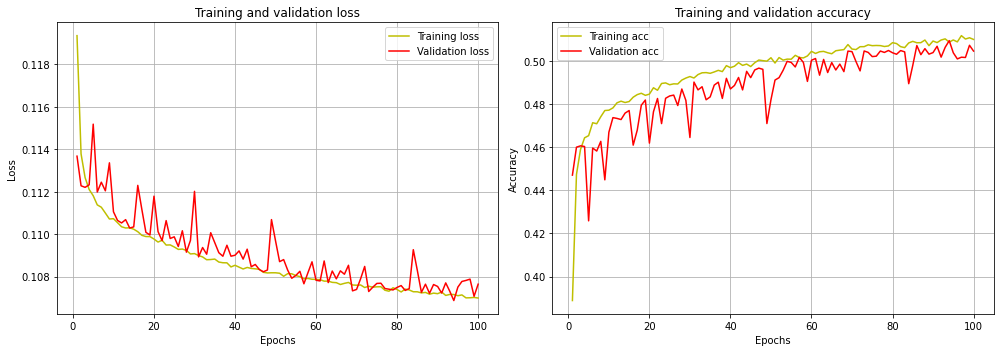

Epoch 1/100
1607/1607 [==============================] - 6s 3ms/step - loss: 0.1247 - r2_keras: 0.3278 - val_loss: 0.1141 - val_r2_keras: 0.4418
Epoch 2/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1136 - r2_keras: 0.4490 - val_loss: 0.1127 - val_r2_keras: 0.4547
Epoch 3/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1127 - r2_keras: 0.4586 - val_loss: 0.1138 - val_r2_keras: 0.4439
Epoch 4/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1122 - r2_keras: 0.4630 - val_loss: 0.1120 - val_r2_keras: 0.4615
Epoch 5/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1116 - r2_keras: 0.4669 - val_loss: 0.1118 - val_r2_keras: 0.4633
Epoch 6/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1114 - r2_keras: 0.4713 - val_loss: 0.1117 - val_r2_keras: 0.4633
Epoch 7/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1114 - r2_keras: 0.4700 - val_loss: 0.1122 - val_r2

Epoch 57/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1084 - r2_keras: 0.4969 - val_loss: 0.1083 - val_r2_keras: 0.4963
Epoch 58/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1085 - r2_keras: 0.4963 - val_loss: 0.1091 - val_r2_keras: 0.4903
Epoch 59/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1084 - r2_keras: 0.4977 - val_loss: 0.1098 - val_r2_keras: 0.4804
Epoch 60/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1084 - r2_keras: 0.4994 - val_loss: 0.1086 - val_r2_keras: 0.4942
Epoch 61/100
1607/1607 [==============================] - 3s 2ms/step - loss: 0.1084 - r2_keras: 0.4985 - val_loss: 0.1086 - val_r2_keras: 0.4940
Epoch 62/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1083 - r2_keras: 0.4998 - val_loss: 0.1093 - val_r2_keras: 0.4881
Epoch 63/100
1607/1607 [==============================] - 4s 2ms/step - loss: 0.1083 - r2_keras: 0.4997 - val_loss: 0.1089 -

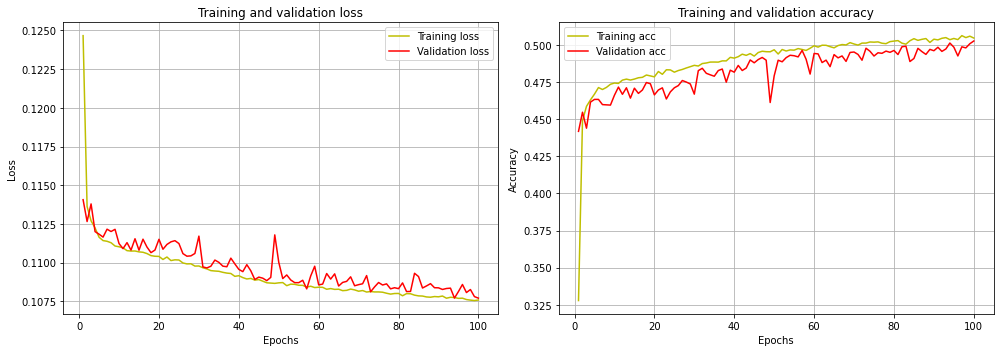

Epoch 1/100
1607/1607 [==============================] - 7s 3ms/step - loss: 0.1202 - r2_keras: 0.3799 - val_loss: 0.1146 - val_r2_keras: 0.4391
Epoch 2/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1130 - r2_keras: 0.4548 - val_loss: 0.1142 - val_r2_keras: 0.4428
Epoch 3/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1123 - r2_keras: 0.4622 - val_loss: 0.1135 - val_r2_keras: 0.4498
Epoch 4/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1114 - r2_keras: 0.4705 - val_loss: 0.1111 - val_r2_keras: 0.4699
Epoch 5/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1112 - r2_keras: 0.4710 - val_loss: 0.1138 - val_r2_keras: 0.4400
Epoch 6/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1110 - r2_keras: 0.4754 - val_loss: 0.1107 - val_r2_keras: 0.4715
Epoch 7/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1109 - r2_keras: 0.4740 - val_loss: 0.1131 - val_r2

Epoch 57/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1077 - r2_keras: 0.5038 - val_loss: 0.1078 - val_r2_keras: 0.5010
Epoch 58/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1077 - r2_keras: 0.5032 - val_loss: 0.1082 - val_r2_keras: 0.4994
Epoch 59/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1076 - r2_keras: 0.5046 - val_loss: 0.1089 - val_r2_keras: 0.4874
Epoch 60/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1077 - r2_keras: 0.5062 - val_loss: 0.1077 - val_r2_keras: 0.5016
Epoch 61/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1076 - r2_keras: 0.5055 - val_loss: 0.1077 - val_r2_keras: 0.5016
Epoch 62/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1076 - r2_keras: 0.5063 - val_loss: 0.1086 - val_r2_keras: 0.4949
Epoch 63/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1075 - r2_keras: 0.5068 - val_loss: 0.1076 -

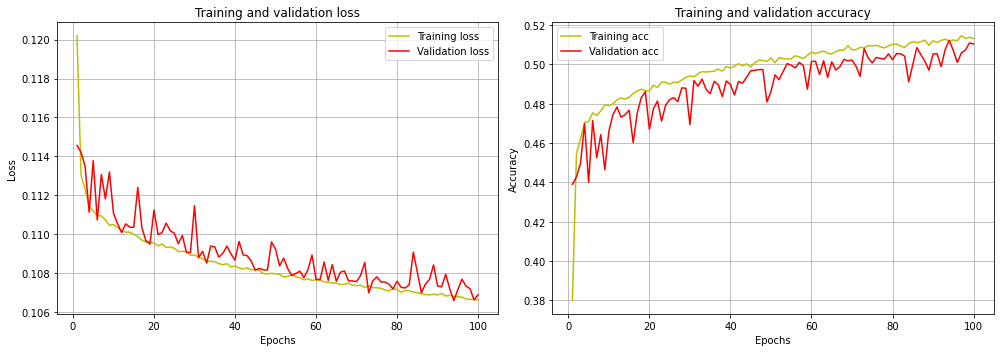

Epoch 1/100
1607/1607 [==============================] - 11s 6ms/step - loss: 0.1192 - r2_keras: 0.3912 - val_loss: 0.1150 - val_r2_keras: 0.4341 r2_keras: 0. - ETA: 5s - loss: 0.1239 -  - ETA: 4s - loss: 0.1230 - r2 - ETA: 3s - loss: 0.1222 - r2_keras - ETA: 3s - loss:
Epoch 2/100
1607/1607 [==============================] - 8s 5ms/step - loss: 0.1135 - r2_keras: 0.4495 - val_loss: 0.1153 - val_r2_keras: 0.43431s - loss: 0.1137 - r2_k - ETA: 0s - loss: 0.1136 - r2_keras: 0. - ETA - ETA: 0s - loss: 0.1135 - r2_keras - ETA: 0s - loss: 0.1135 - r2_keras
Epoch 3/100
1607/1607 [==============================] - 7s 4ms/step - loss: 0.1124 - r2_keras: 0.4609 - val_loss: 0.1122 - val_r2_keras: 0.4605r2_ker
Epoch 4/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1119 - r2_keras: 0.4663 - val_loss: 0.1119 - val_r2_keras: 0.4639
Epoch 5/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1117 - r2_keras: 0.4665 - val_loss: 0.1151 - val_r2_keras: 0.4264
E

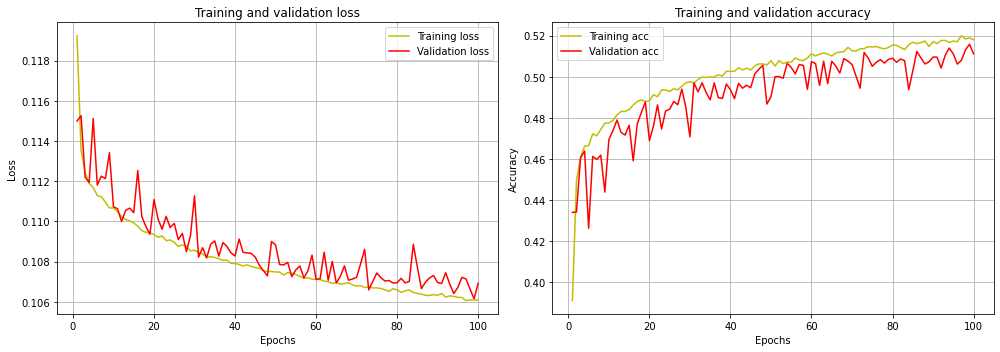

Epoch 1/100
1607/1607 [==============================] - 8s 4ms/step - loss: 0.1183 - r2_keras: 0.4010 - val_loss: 0.1140 - val_r2_keras: 0.4435s: 0.1184 - r2_k
Epoch 2/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1139 - r2_keras: 0.4465 - val_loss: 0.1121 - val_r2_keras: 0.4612
Epoch 3/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1128 - r2_keras: 0.4580 - val_loss: 0.1122 - val_r2_keras: 0.4606
Epoch 4/100
1607/1607 [==============================] - 7s 4ms/step - loss: 0.1123 - r2_keras: 0.4628 - val_loss: 0.1147 - val_r2_keras: 0.4386
Epoch 5/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1120 - r2_keras: 0.4633 - val_loss: 0.1153 - val_r2_keras: 0.4246118 - r2_ker - ETA: 2s - loss: 0.1122  - ETA: 2s - loss: 0.1120 - r2_keras - ETA: 2s - loss: 0.1120 - r2 - ETA: 1s - ETA: 1s - loss: 0.112 - ETA: 0s - loss: 0.1
Epoch 6/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1116 - r2_keras: 0.4

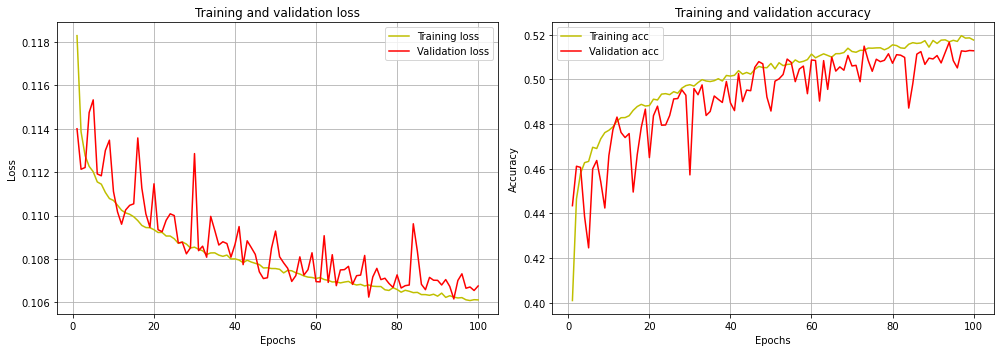

Epoch 1/100
1607/1607 [==============================] - 8s 4ms/step - loss: 0.1196 - r2_keras: 0.3869 - val_loss: 0.1135 - val_r2_keras: 0.4477
Epoch 2/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1140 - r2_keras: 0.4454 - val_loss: 0.1115 - val_r2_keras: 0.4658
Epoch 3/100
1607/1607 [==============================] - 7s 4ms/step - loss: 0.1128 - r2_keras: 0.4574 - val_loss: 0.1123 - val_r2_keras: 0.4591
Epoch 4/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1124 - r2_keras: 0.4619 - val_loss: 0.1151 - val_r2_keras: 0.4349
Epoch 5/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1121 - r2_keras: 0.4623 - val_loss: 0.1151 - val_r2_keras: 0.4262
Epoch 6/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1117 - r2_keras: 0.4683 - val_loss: 0.1128 - val_r2_keras: 0.4516
Epoch 7/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1115 - r2_keras: 0.4685 - val_loss: 0.1119 - val_r2

1607/1607 [==============================] - 6s 3ms/step - loss: 0.1064 - r2_keras: 0.5161 - val_loss: 0.1071 - val_r2_keras: 0.5080
Epoch 93/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1065 - r2_keras: 0.5162 - val_loss: 0.1073 - val_r2_keras: 0.5072
Epoch 94/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1064 - r2_keras: 0.5151 - val_loss: 0.1064 - val_r2_keras: 0.5150
Epoch 95/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1063 - r2_keras: 0.5163 - val_loss: 0.1072 - val_r2_keras: 0.5079
Epoch 96/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1064 - r2_keras: 0.5157 - val_loss: 0.1077 - val_r2_keras: 0.5020
Epoch 97/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1063 - r2_keras: 0.5183 - val_loss: 0.1071 - val_r2_keras: 0.5084
Epoch 98/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1063 - r2_keras: 0.5165 - val_loss: 0.1067 - val_r2_keras

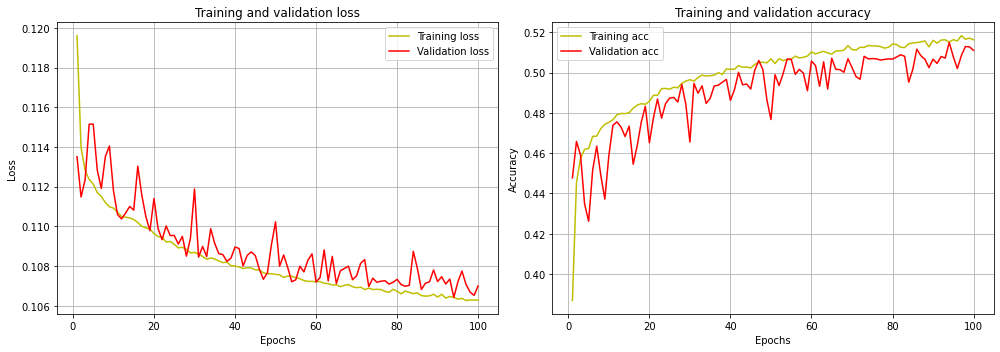

Epoch 1/100
1607/1607 [==============================] - 6s 3ms/step - loss: 0.1195 - r2_keras: 0.3877 - val_loss: 0.1146 - val_r2_keras: 0.4401
Epoch 2/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1133 - r2_keras: 0.4518 - val_loss: 0.1146 - val_r2_keras: 0.4391
Epoch 3/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1127 - r2_keras: 0.4587 - val_loss: 0.1142 - val_r2_keras: 0.4424
Epoch 4/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1120 - r2_keras: 0.4648 - val_loss: 0.1126 - val_r2_keras: 0.4560
Epoch 5/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1118 - r2_keras: 0.4656 - val_loss: 0.1149 - val_r2_keras: 0.4284
Epoch 6/100
1607/1607 [==============================] - 4s 3ms/step - loss: 0.1115 - r2_keras: 0.4707 - val_loss: 0.1114 - val_r2_keras: 0.4651
Epoch 7/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1115 - r2_keras: 0.4689 - val_loss: 0.1134 - val_r2

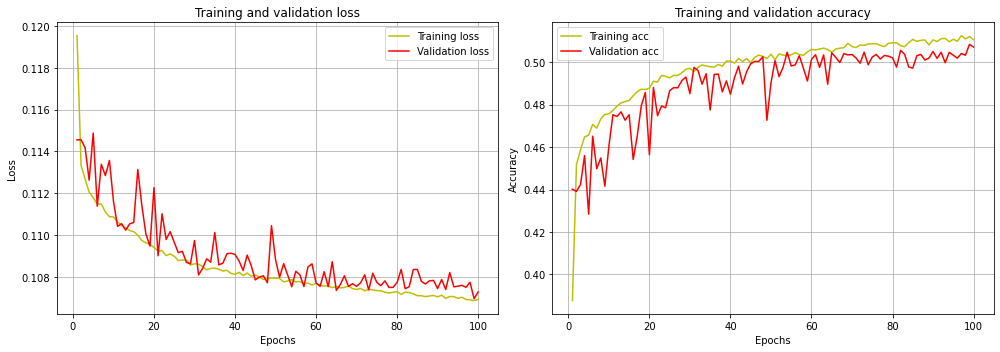

Epoch 1/100
1607/1607 [==============================] - 10s 4ms/step - loss: 0.1181 - r2_keras: 0.4018 - val_loss: 0.1164 - val_r2_keras: 0.4204
Epoch 2/100
1607/1607 [==============================] - 7s 4ms/step - loss: 0.1133 - r2_keras: 0.4519 - val_loss: 0.1155 - val_r2_keras: 0.4322
Epoch 3/100
1607/1607 [==============================] - 6s 4ms/step - loss: 0.1123 - r2_keras: 0.4621 - val_loss: 0.1135 - val_r2_keras: 0.4497
Epoch 4/100
1607/1607 [==============================] - 7s 4ms/step - loss: 0.1118 - r2_keras: 0.4669 - val_loss: 0.1131 - val_r2_keras: 0.4546
Epoch 5/100
1607/1607 [==============================] - 5s 3ms/step - loss: 0.1116 - r2_keras: 0.4677 - val_loss: 0.1148 - val_r2_keras: 0.4287
Epoch 6/100
1607/1607 [==============================] - 6s 3ms/step - loss: 0.1112 - r2_keras: 0.4732 - val_loss: 0.1110 - val_r2_keras: 0.4702
Epoch 7/100
1607/1607 [==============================] - 6s 3ms/step - loss: 0.1112 - r2_keras: 0.4714 - val_loss: 0.1120 - val_r

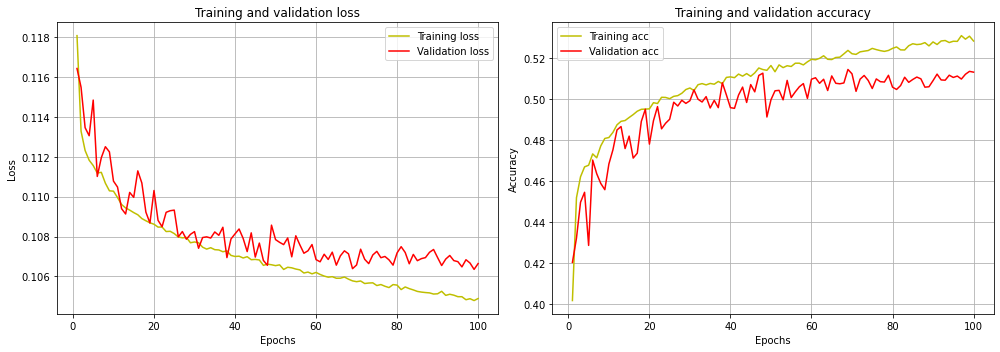

Epoch 1/100
1607/1607 [==============================] - 19s 10ms/step - loss: 0.1176 - r2_keras: 0.4071 - val_loss: 0.1156 - val_r2_keras: 0.4282
Epoch 2/100
1607/1607 [==============================] - 18s 11ms/step - loss: 0.1138 - r2_keras: 0.4473 - val_loss: 0.1127 - val_r2_keras: 0.4562
Epoch 3/100
1607/1607 [==============================] - 19s 12ms/step - loss: 0.1128 - r2_keras: 0.4574 - val_loss: 0.1128 - val_r2_keras: 0.4540TA: 0s - loss: 0 - ETA: 0s - loss: 0.1128 - r2_keras: 0.45
Epoch 4/100
1607/1607 [==============================] - 17s 11ms/step - loss: 0.1123 - r2_keras: 0.4621 - val_loss: 0.1156 - val_r2_keras: 0.4322
Epoch 5/100
1607/1607 [==============================] - 17s 11ms/step - loss: 0.1121 - r2_keras: 0.4625 - val_loss: 0.1146 - val_r2_keras: 0.43140s - loss: 0.112
Epoch 6/100
1607/1607 [==============================] - 21s 13ms/step - loss: 0.1116 - r2_keras: 0.4695 - val_loss: 0.1122 - val_r2_keras: 0.4576TA:  - ETA: 1s - loss: - ETA: 0s - loss: 0.11

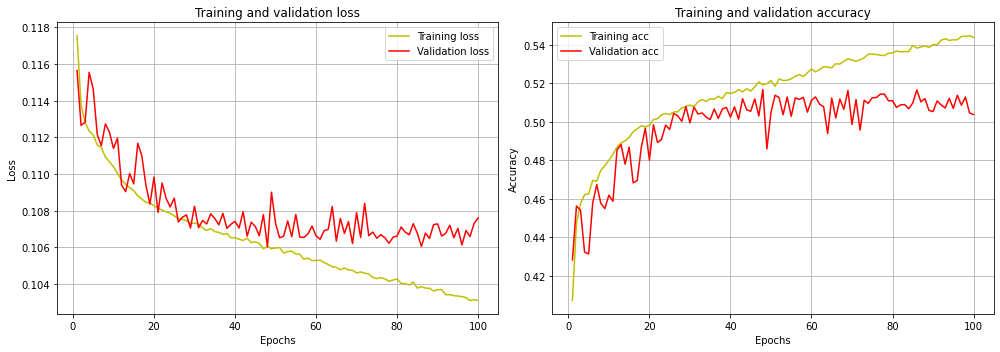

Epoch 1/100
1607/1607 [==============================] - 36s 20ms/step - loss: 0.1194 - r2_keras: 0.3887 - val_loss: 0.1153 - val_r2_keras: 0.4294
Epoch 2/100
1607/1607 [==============================] - 27s 17ms/step - loss: 0.1144 - r2_keras: 0.4410 - val_loss: 0.1131 - val_r2_keras: 0.4523
Epoch 3/100
1607/1607 [==============================] - 28s 18ms/step - loss: 0.1133 - r2_keras: 0.4530 - val_loss: 0.1124 - val_r2_keras: 0.4574134 - r2_keras:  - ETA: 1s - los - ETA: 1s - loss: - ETA: 0s - los
Epoch 4/100
1607/1607 [==============================] - 31s 20ms/step - loss: 0.1127 - r2_keras: 0.4590 - val_loss: 0.1152 - val_r2_keras: 0.4356
Epoch 5/100
1607/1607 [==============================] - 35s 22ms/step - loss: 0.1121 - r2_keras: 0.4631 - val_loss: 0.1141 - val_r2_keras: 0.4359
Epoch 6/100
1607/1607 [==============================] - 31s 19ms/step - loss: 0.1116 - r2_keras: 0.4693 - val_loss: 0.1121 - val_r2_keras: 0.4571
Epoch 7/100
1607/1607 [=============================

1607/1607 [==============================] - 28s 17ms/step - loss: 0.1025 - r2_keras: 0.5491 - val_loss: 0.1074 - val_r2_keras: 0.5034
Epoch 97/100
1607/1607 [==============================] - 30s 19ms/step - loss: 0.1025 - r2_keras: 0.5513 - val_loss: 0.1078 - val_r2_keras: 0.4999
Epoch 98/100
1607/1607 [==============================] - 25s 15ms/step - loss: 0.1024 - r2_keras: 0.5501 - val_loss: 0.1068 - val_r2_keras: 0.5090
Epoch 99/100
1607/1607 [==============================] - 25s 15ms/step - loss: 0.1024 - r2_keras: 0.5516 - val_loss: 0.1069 - val_r2_keras: 0.5073
Epoch 100/100
1607/1607 [==============================] - 25s 16ms/step - loss: 0.1024 - r2_keras: 0.5500 - val_loss: 0.1074 - val_r2_keras: 0.5060
epochs= 100
shff_fg= 1
Norm_fg= 1
lyr_no= 10
neo= 75
 MSE_ANN_nshf: 0.008077
 RMSE_ANN_nshf: 0.089871
Normalized RMSE_ANN_nshf: 0.099560
R2_ANN_nshf: 0.558368
MAE_nshf: 0.070588
 MSE_ANN_shf: 0.011766
 RMSE_ANN_shf: 0.108473
Normalized RMSE_ANN_shf: 0.108937
R2_ANN_shf: 0

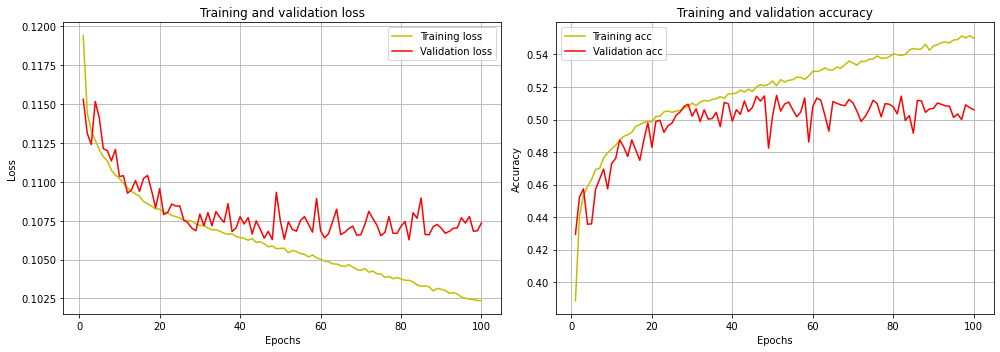

Epoch 1/100
1607/1607 [==============================] - 33s 17ms/step - loss: 0.1189 - r2_keras: 0.3934 - val_loss: 0.1144 - val_r2_keras: 0.4407
Epoch 2/100
1607/1607 [==============================] - 27s 17ms/step - loss: 0.1149 - r2_keras: 0.4364 - val_loss: 0.1168 - val_r2_keras: 0.4103ETA: 2s - loss: 0.1148  - ETA: 0s - loss: 0.1149 - r2_keras: 
Epoch 3/100
1607/1607 [==============================] - 26s 16ms/step - loss: 0.1137 - r2_keras: 0.4493 - val_loss: 0.1131 - val_r2_keras: 0.4519.1137 - 
Epoch 4/100
1607/1607 [==============================] - 25s 16ms/step - loss: 0.1132 - r2_keras: 0.4540 - val_loss: 0.1154 - val_r2_keras: 0.4329
Epoch 5/100
1607/1607 [==============================] - 25s 15ms/step - loss: 0.1126 - r2_keras: 0.4578 - val_loss: 0.1122 - val_r2_keras: 0.4582
Epoch 6/100
1607/1607 [==============================] - 26s 16ms/step - loss: 0.1121 - r2_keras: 0.4645 - val_loss: 0.1122 - val_r2_keras: 0.4573
Epoch 7/100
1607/1607 [==========================

In [ ]:
# for pw_mod_sw in range(9):
for pw_mod_sw in pow_mod_combs:
    
    
    import tensorflow as tf
    tf.random.set_seed(42)
    from numpy.random import seed
    seed(0)

    if pw_mod_sw==0: 
        df['PwMod']=df.speedOverGround_poly3_2+(12.5*df.waveheight_poly3*df.Cos_HWaveP)+(0.5*df.windspeed_poly1_5*df.Cos_HWindP)
        inputs=['PwMod']
        df = df.dropna(subset=['PwMod'])

    if pw_mod_sw==1: 
        df['PwMod']=df.speedOverGround_poly3_2+(df.waveheight_poly3*df.Cos_HWaveP)+(df.windspeed_poly1_5*df.Cos_HWindP)
        inputs=['PwMod']
        df = df.dropna(subset=['PwMod'])


    if pw_mod_sw==2: 
        inputs=['speedOverGround_poly3_2', 'waveheight_poly3' , 'Cos_HWaveP', 'windspeed_poly1_5', 'Cos_HWindP' ]    

        df = df.dropna(subset=['speedOverGround_poly3_2', 'waveheight_poly3' , 'Cos_HWaveP', 'windspeed_poly1_5', 'Cos_HWindP' ])

        #     if ann_sw<=2:
        #         lyr_no=3
        #         neo=25
        #         epcs=1000
        #     if ann_sw<=2:
        #         lyr_no=5
        #         neo=100
        #         epcs=1000  

    ##############
    if pw_mod_sw==3: 
        inputs=['speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
                'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff']   

    if pw_mod_sw==4: 
        inputs=['speedOverGround_poly3_2', 'waveheight_poly3' , 'Cos_HWaveP', 'windspeed_poly1_5', 'Cos_HWindP',
               'speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
                'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff']   

        df = df.dropna(subset=['speedOverGround_poly3_2', 'waveheight_poly3' , 'Cos_HWaveP', 'windspeed_poly1_5', 'Cos_HWindP' ])

    if pw_mod_sw==5: 
        df['PwMod']=df.speedOverGround_poly3_2+(12.5*df.waveheight_poly3*df.Cos_HWaveP)+(0.5*df.windspeed_poly1_5*df.Cos_HWindP)

        inputs=['PwMod',
               'speedOverGround','courseOverGroundTrue', 'windSpeedOverGround', 'directionTrue','distanceFromDock','accumDistLeg','accumTimeLeg',
                'distanceToNextDock', 'speedApparent', 'pitch', 'wind_course_diff'] 

        df = df.dropna(subset=['PwMod'])


    # In[ ]:

    if (pw_mod_sw==0) | (pw_mod_sw==1): 
        df.PwMod.shape
        df.PwMod.describe()

        df[['EngineFuelRate', 'PwMod']].corr(method='pearson')
        # df[['engineActualPercentTorque', 'PwMod']].corr(method='pearson')
        # df[['engineSpeed', 'PwMod']].corr(method='pearson')
        # df[['accelPedalPos', 'PwMod']].corr(method='pearson')
        # df[['accumFuelLeg', 'PwMod']].corr(method='pearson')




    if df['directionTrue'].max()<300:
        df['directionTrue']= df['directionTrue']/np.pi*180


        df['directionTrue'].max()
        # df['headingMagnetic'].max()


    # In[ ]:


    df['wind_course_diff']=df['directionTrue']-df['courseOverGroundTrue']
    df['wind_head_diff']=df['directionTrue']-df['headingMagnetic']
    ###########


    # In[ ]:


    if latlon_prs_fg==0:print('lat and lon in past values')  ## Use the past values for location data (lat, Lon)

    if latlon_prs_fg==1: ## Use the present values for location data (lat, Lon)

        if 'latitude' in (inputs): df['latitude']=df_orig['latitude']

        if 'longitude' in (inputs): df['longitude']=df_orig['longitude']


    # In[ ]:


    if Phi_course_fg==0:
        df['courseOverGroundTrue'] = df['courseOverGroundTrue'] 
    if Phi_course_fg==1:
        df['courseOverGroundTrue'] = df['courseOverGroundTrue'] - df['headingMagnetic']


    # In[ ]:


    Phi_course_fg
    df['headingMagnetic'].describe()
    df['courseOverGroundTrue'].describe()


    # In[ ]:


    if diff_fg==0:
        df=df
    if diff_fg==1:
    #     df[inputs].diff(-1).describe()  #forward diff
        df[inputs]=df[inputs].diff(-1)
    if diff_fg==2:
    #     df[inputs].diff(1).describe()  #bacward diff
        df[inputs]=df[inputs].diff(1).shift(-1)

    df[inputs].iloc[-1]=df[inputs].iloc[-2]


    # In[ ]:


    if add_diff_fg==0:
        df=df
    if add_diff_fg==1:
        df[['diff_speedOverGround', 'diff_courseOverGroundTrue']]=df[['speedOverGround', 'courseOverGroundTrue']].diff(-1)
        inputs.extend(('diff_speedOverGround', 'diff_courseOverGroundTrue'))

    if add_diff_fg==2:
        df[['diff_speedOverGround', 'diff_courseOverGroundTrue']]=df[['speedOverGround', 'courseOverGroundTrue']].diff(-1).shift(-1)
        inputs.extend(('diff_speedOverGround', 'diff_courseOverGroundTrue'))

    df.iloc[-1]=df.iloc[-2]
    # df.tail()


    # In[ ]:


    df[['EngineFuelRate', 'speedOverGround']].corr(method='pearson')


    # In[ ]:


    if add_diff_fg!=0:
        print(df[['EngineFuelRate', 'diff_speedOverGround']].corr(method='pearson'))


    # In[ ]:


    inputs


    # In[ ]:


    df_outs=df[outputs]

    df_ins=df[inputs]

    df_outs.shape
    df_ins.shape

    df_ins.isna().sum()
    df_outs.isna().sum()
    df_ins.head()
    df_outs.head()


    # In[ ]:


    if diff_fg!=0:
        df_ins.iloc[-1]=df_ins.iloc[-2]

    df_ins.head()
    # df_ins.tail()


    # In[ ]:


    df_outs.iloc[1500:1515]


    # In[ ]:


    df_ins.iloc[1500:1515]


    # In[ ]:


    # if diff_drop==1:
    #     df_ins=df_ins.drop(['wind_course_diff'], axis=1)
    # if diff_drop!=1:
    #     df_ins=df_ins


    # In[ ]:


    outs_id = " ".join(outputs)
    outs_id = outs_id.replace(" ", "_")

    ins_id = " ".join(inputs)
    ins_id = ins_id.replace(" ", "_")

    outs_id
    ins_id


    # In[ ]:


    if max_norm==1:
        df_ins_norm= df_ins/ df_ins.max(axis=0)
        # df_ins_norm = (df_ins - df_ins.min()) / (df_ins.max() - df_ins.min())

        df_outs_norm= df_outs/ df_outs.max(axis=0)
        # df_outs_norm = (df_outs - df_outs.min()) / (df_outs.max() - df_outs.min())

        df_ins=df_ins_norm
        df_outs=df_outs_norm

        # df_ins.describe()
        # df_outs.describe()

    if max_norm==2:
        df_ins_norm= (df_ins-df_ins.mean(axis=0))/ df_ins.std(axis=0)

        df_outs_norm= (df_outs-df_outs.mean(axis=0))/ df_outs.std(axis=0)

        df_ins=df_ins_norm
        df_outs=df_outs_norm

        # df_ins.describe()
        # df_outs.describe()

    # st=stop

    # In[ ]:


    import numpy as np
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    from scipy.stats import linregress
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_absolute_error

    ##########################
    if sz_fg==0: size=1800
    if sz_fg==1: size=10000
    if sz_fg==2: size=100000
    if sz_fg==3: size=len(df)
    ############################

    if tempo_res=='1min': size=len(df)

    ##########################

    X = df_ins.iloc[:size]
    y = df_outs.iloc[:size]


    # In[ ]:


    X.isna().sum()
    if 'distanceToNextDock' in (inputs): 
        X_filled=X.distanceToNextDock.interpolate(method='linear', limit_direction='forward', axis=0)
        X_filled2=X_filled.interpolate(method='linear', limit_direction='backward', axis=0)
        X.distanceToNextDock=X_filled2 
        X.isna().sum()

##################################################################################################################
##################################################################################################################

    df_stats=pd.DataFrame([])

    dfst_iter=[]; dfst_phy_mod_sw=[]; dfst_inps=[];  dfst_DTsz=[]; 
    dfst_inps_list=[]; dfst_outs_list=[];
    dfst_MSE_nshf=[]; dfst_RMSE_nshf=[]; dfst_R2_nshf=[]; dfst_MAE_nshf=[]
    dfst_MSE_shf=[]; dfst_RMSE_shf=[]; dfst_R2_shf=[]; dfst_MAE_shf=[]
    dfst_Neo=[]; dfst_Lyrs=[]; dfst_epcs=[]
    dfst_shff=[]; dfst_norm=[]
    kk=0
    
    
############################################################################
############################################################################
#### ANN modeling

    for shff_fg in shuff_combs:
        for max_norm in norm_combs:

            for lyr_no in lyr_combs:
                for neo in neo_combs:

                    import tensorflow as tf
                    tf.random.set_seed(42)
                    from numpy.random import seed
                    seed(0)

                    from sklearn.model_selection import train_test_split

                    if shff_fg ==1:  ### with shuffling the data
                        X_train, X_vlid, Y_train, Y_valid = train_test_split(X, y, test_size=0.2,train_size=0.8)
                        X_valid, X_test, Y_valid, Y_test = train_test_split(X_vlid,Y_valid, test_size = 0.25,train_size =0.75)

                    if shff_fg==0: ### without shuffling the data
                        X_train, X_vlid, Y_train, Y_valid = train_test_split(X, y, test_size=0.2,train_size=0.8, shuffle = False)
                        X_valid, X_test, Y_valid, Y_test = train_test_split(X_vlid,Y_valid, test_size = 0.25,train_size =0.75, shuffle = False)

                    ######################################################
                    # from sklearn.preprocessing import MinMaxScaler
                    # scaler = MinMaxScaler()
                    # scaler.fit(X)
                    # X = scaler.transform(X)

                    # #Split data into train and test to verify accuracy after fitting the model. 
                    # from sklearn.model_selection import train_test_split
                    # X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
                   
                    #################### Inputs ########################
                    input_sig = X.columns
                    outcome_variable =y.columns


                    # check_path = 'C:/Users/'+user_name+'/iHelm/ECO KIT/Data_analysi_final/'
                    # model_path = 'C:/Users/'+user_name+'/iHelm/ECO KIT/Data_analysi_final/'

                    check_path = 'C:/Users/'+user_name+'/iHelm/ECO KIT/Data_analysi_final/'
                    model_path = 'C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/iHelm/ECO KIT/Data_analysi_final/'


                    model_name = 'Phy_fl_mod_outs_'+outs_id+'_ins_'+ins_id+'_phi_'+str(Phi_course_fg)+'_diff_'+str(add_diff_fg)+'_norm_'+str(max_norm)+'_tpfl_smps_'+str(top_fl_smps)+'_'+tempo_res+'_outs_'+str(outs_no)+'_lyrs_'+str(lyr_no)+'_epc_'+str(epcs)+'_Neo_'+str(neo)
                    scale_name = 'Phy_fl_sc20_outs_'+outs_id+'_ins_'+ins_id+'+_phi_'+str(Phi_course_fg)+'_diff_'+str(add_diff_fg)+'_norm_'+str(max_norm)+'_tpfl_smps_'+str(top_fl_smps)+'_'+tempo_res+'_outs_'+str(outs_no)+'_lyrs_'+str(lyr_no)+'_epc_'+str(epcs)+'_Neo_'+str(neo)


                    # In[ ]:


                    # Define r2_keras as an accuracy metrics
                    def r2_keras(y_true, y_pred):

                        ss_res = k.sum(k.square(y_true - y_pred))
                        ss_tot = k.sum(k.square(y_true - k.mean(y_true)))
                        return 1-ss_res/(ss_tot + k.epsilon())

                    # Define rmse as a loss function
                    def rmse(y_true, y_pred):

                        return k.sqrt(k.mean(k.square(y_true - y_pred)))
                    ###########################################################################################################

                    if cross_valid==0:

                        # Training function:
                        #     def training(x_train, y_train, x_valid, y_valid, path, outs_no, lyr_no, neo,  epcs, shff_fg):
                            # creating a model

                        model = Sequential()

                        if lyr_no==1:
                            model.add(Dense(neo, activation='elu'))
                        if lyr_no==2:
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                        if lyr_no==3:
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                        if lyr_no==4:
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                        if lyr_no==5:
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                        if lyr_no==10:
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                        if lyr_no==20:
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))
                            model.add(Dense(neo, activation='elu'))


                        model.add(Dense(outs_no, activation='relu'))

                        #         Configure the model for training
                        model.compile(loss=[rmse], optimizer='adam', metrics=[r2_keras])

                        # print(model.summary())

                        ##########################################

                        # Fit with early stopping and model checkpoint to save the best models. 
                        # from keras.callbacks import EarlyStopping, ModelCheckpoint
                        # # patient early stopping
                        # es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
                        # mc = ModelCheckpoint('models/model-{epoch:03d}-{accuracy:03f}-{val_accuracy:03f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
                        # # evaluate the model
                        # history = model.fit(X_train, y_train ,verbose=1, epochs=500, batch_size=64,
                        #                     validation_data=(X_test, y_test), callbacks=[es, mc])

                        #Fit with no early stopping or other callbacks
                        history = model.fit(X_train, Y_train ,verbose=1, epochs=epcs, batch_size=64, validation_data=(X_test, Y_test))

                    ###########################################################################################################
                    if cross_valid==1:
                        # Training function:
                        def training(x_train, y_train, x_valid, y_valid, path, outs_no, lyr_no, neo,  epcs, shff_fg):
                            # creating a model
                            model = Sequential()

                            if lyr_no==1:
                                model.add(Dense(neo, activation='elu'))
                            if lyr_no==2:
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                            if lyr_no==3:
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                            if lyr_no==4:
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                            if lyr_no==5:
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                            if lyr_no==10:
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                            if lyr_no==20:
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))
                                model.add(Dense(neo, activation='elu'))

                            model.add(Dense(outs_no, activation='relu'))

                            # Configure the model for training
                            model.compile(loss=[rmse], optimizer='adam', metrics=[r2_keras])

                            # Save the best model (depends on testing the validation data ) after every epoch.
                            model_path_id=check_path+model_name+'.hdf5'

                            if len(check_path+model_name+'.hdf5')>256:
                                model_path_id = model_path_id.replace('speedOverGround', 'sog')
                                model_path_id = model_path_id.replace('speed', 'sp')
                                model_path_id = model_path_id.replace('distance', 'ds')
                                model_path_id = model_path_id.replace('courseOverGroundTrue', 'cog')
                                model_path_id = model_path_id.replace('windOverGroundTrue', 'wogt')
                                model_path_id = model_path_id.replace('windSpeedOverGround', 'wsog')
                                model_path_id = model_path_id.replace('EngineFuelRate', 'fl')
                                model_path_id = model_path_id.replace('Dock', 'dk')
                                model_path_id = model_path_id.replace('ToPrevious', 'tp')
                                model_path_id = model_path_id.replace('ToNext', 'tp')
                                model_path_id = model_path_id.replace('directionTrue', 'dr')
                                model_path_id = model_path_id.replace('accumTimeLeg', 'atl')
                                model_path_id = model_path_id.replace('Apparent', 'ap')
                                model_path_id = model_path_id.replace('Phy_fl_mod_outs_fl_ins_sog_poly3_2_waveheight_poly3_windsp_poly1_5_meanwaveperiod_heading_wave_Cos_HWaveP_Cos_HWindP_PwMod_', 'Terms_Phy_Mod')
                                model_path_id = model_path_id.replace('sog_poly3_2_waveheight_poly3_windsp_poly1_5_Cos_HWaveP_Cos_HWind', 'Terms_Phy_Mod')
                                model_path_id = model_path_id.replace('sog_poly3_2_windsp_poly1_5_Cos_HWindP_PwMod_wavedrag_coeff', 'Terms_Phy_Mod')

                                model_path_id = model_path_id.replace('Phy_fl_mod_outs_fl_ins_sog_poly3_2_waveheight_poly3_Cos_HWaveP_windsp_poly1_5_Cos_HWindP_sog_cog_wsog_dr_dsFromdk_accumDi', 'Terms_Phy_Mod')


                            checkpointer = ModelCheckpoint(filepath=model_path_id, verbose=1, save_best_only=True,
                                                           save_weights_only=False, period=1)
                            # Stop training when the loss function (rmse) has stopped improving
                            early_stopping = EarlyStopping(monitor='val_loss', patience=50, verbose=1)

                            # Reduce learning rate when the loss function (rmse) has stopped improving.
                            redu_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=10, verbose=1, mode='min', min_delta=0.0001,
                                                        cooldown=0, min_lr=0)
                            # Do the training
                            if shff_fg==0:
                                estimator = model.fit(x=x_train, y=y_train, batch_size=round(0.05*x_train.shape[0]), epochs=epcs,
                                                      validation_split=0, validation_data=(x_valid, y_valid),
                                                      callbacks=[checkpointer, early_stopping, redu_lr], verbose=0, shuffle=False)
                            if shff_fg==1:
                                estimator = model.fit(x=x_train, y=y_train, batch_size=round(0.05*x_train.shape[0]), epochs=epcs,
                                                  validation_split=0, validation_data=(x_valid, y_valid),
                                                  callbacks=[checkpointer, early_stopping, redu_lr], verbose=0, shuffle=True)

                            return estimator

                        from sklearn.model_selection import cross_val_score

                    #     history = model.fit(X_train, Y_train ,verbose=1, epochs=epcs, batch_size=64,
                    #                 validation_data=(X_test, Y_test))

                        history=training(X_train, Y_train, X_valid, Y_valid, check_path, outs_no, lyr_no, neo,  epcs, shff_fg)
                            #### Loading best model and evaluate it with test data ####
                        model_path_id=check_path+model_name+'.hdf5'
                        if len(check_path+model_name+'.hdf5')>256:
                            model_path_id = model_path_id.replace('speedOverGround', 'sog')
                            model_path_id = model_path_id.replace('speed', 'sp')
                            model_path_id = model_path_id.replace('distance', 'ds')
                            model_path_id = model_path_id.replace('courseOverGroundTrue', 'cog')
                            model_path_id = model_path_id.replace('windOverGroundTrue', 'wogt')
                            model_path_id = model_path_id.replace('windSpeedOverGround', 'wsog')
                            model_path_id = model_path_id.replace('EngineFuelRate', 'fl')
                            model_path_id = model_path_id.replace('Dock', 'dk')
                            model_path_id = model_path_id.replace('ToPrevious', 'tp')
                            model_path_id = model_path_id.replace('ToNext', 'tp')
                            model_path_id = model_path_id.replace('directionTrue', 'dr')
                            model_path_id = model_path_id.replace('accumTimeLeg', 'atl')
                            model_path_id = model_path_id.replace('Apparent', 'ap')
                            model_path_id = model_path_id.replace('Phy_fl_mod_outs_fl_ins_sog_poly3_2_waveheight_poly3_windsp_poly1_5_meanwaveperiod_heading_wave_Cos_HWaveP_Cos_HWindP_PwMod_', 'Terms_Phy_Mod')
                            model_path_id = model_path_id.replace('sog_poly3_2_waveheight_poly3_windsp_poly1_5_Cos_HWaveP_Cos_HWind', 'Terms_Phy_Mod')
                            model_path_id = model_path_id.replace('sog_poly3_2_windsp_poly1_5_Cos_HWindP_PwMod_wavedrag_coeff', 'Terms_Phy_Mod')

                            model_path_id = model_path_id.replace('Phy_fl_mod_outs_fl_ins_sog_poly3_2_waveheight_poly3_Cos_HWaveP_windsp_poly1_5_Cos_HWindP_sog_cog_wsog_dr_dsFromdk_accumDi', 'Terms_Phy_Mod')


                        best_model = keras.models.load_model(model_path_id, custom_objects={'rmse': rmse, 'r2_keras': r2_keras })
                    #########################################
                        def baseline_model():
                            # create model
                            model = Sequential()
                            model.add(Dense(neo, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
                            model.add(Dense(1, kernel_initializer='normal'))
                            # Compile model
                    #         model.compile(loss=rmse, optimizer='adam')
                            model.compile(loss=mean_squared_error, optimizer='adam')
                    #         model.compile(loss=mean_absolute_error, optimizer='adam')
                    #         model.compile(loss=r2_score, optimizer='adam')
                            return model

                        from keras.wrappers.scikit_learn import KerasRegressor
                        estimator=KerasRegressor(build_fn=baseline_model, batch_size=round(0.05*X_train.shape[0]), epochs=epcs)

                        scores=cross_val_score(estimator=estimator, X=X_train.values, y=Y_train.values, cv=5, n_jobs=-1)
                        print('#########')
                        print('cross_validation_score=', scores.mean())

                    ##########################################################################################################
                    X_train_nshf, X_vlid_nshf, Y_train_nshf, Y_valid_nshf = train_test_split(X, y, test_size=0.2,train_size=0.8, shuffle = False)
                    X_valid_nshf, X_test_nshf, Y_valid_nshf, Y_test_nshf = train_test_split(X_vlid_nshf,Y_valid_nshf, test_size = 0.25,train_size =0.75, shuffle = False)

                    X_train_shf, X_vlid_shf, Y_train_shf, Y_valid_shf = train_test_split(X, y, test_size=0.2,train_size=0.8, shuffle = True)
                    X_valid_shf, X_test_shf, Y_valid_shf, Y_test_shf = train_test_split(X_vlid_shf,Y_valid_shf, test_size = 0.25,train_size =0.75, shuffle = True)


                    y_pred_ANN_nshf = model.predict(x=X_test_nshf, batch_size=None, verbose=0, steps=None)

                    y_pred_ANN_shf = model.predict(x=X_test_shf, batch_size=None, verbose=0, steps=None)
                    ############

                    mse_1_nshf = mean_squared_error(y_true=Y_test_nshf.iloc[:,0], y_pred=y_pred_ANN_nshf[:,0], squared=True)
                    rmse_1_nshf = mean_squared_error(y_true=Y_test_nshf.iloc[:,0], y_pred=y_pred_ANN_nshf[:,0], squared=False)
                    R2_1_nshf=r2_score(y_true=Y_test_nshf.iloc[:,0], y_pred=y_pred_ANN_nshf[:,0])
                    mae_nshf=mean_absolute_error(y_true=Y_test_nshf.iloc[:,0], y_pred=y_pred_ANN_nshf[:,0])
                    rmse_n1_nshf=rmse_1_nshf/Y_test_nshf.iloc[:,0].max()
                    rmse_n1_nshf

                    mse_1_shf = mean_squared_error(y_true=Y_test_shf.iloc[:,0], y_pred=y_pred_ANN_shf[:,0], squared=True)
                    rmse_1_shf = mean_squared_error(y_true=Y_test_shf.iloc[:,0], y_pred=y_pred_ANN_shf[:,0], squared=False)
                    R2_1_shf=r2_score(y_true=Y_test_shf.iloc[:,0], y_pred=y_pred_ANN_shf[:,0])
                    mae_shf=mean_absolute_error(y_true=Y_test_shf.iloc[:,0], y_pred=y_pred_ANN_shf[:,0])
                    rmse_n1_shf=rmse_1_shf/Y_test_shf.iloc[:,0].max()
                    rmse_n1_shf

                    ################################################
                    print('epochs=', epcs)
                    print('shff_fg=', shff_fg)
                    print('Norm_fg=', max_norm)
                    print('lyr_no=', lyr_no)
                    print('neo=', neo)
                    
                    print(' MSE_ANN_nshf: {:.6f}'.format(mse_1_nshf))
                    print(' RMSE_ANN_nshf: {:.6f}'.format(rmse_1_nshf))
                    print('Normalized RMSE_ANN_nshf: {:.6f}'.format(rmse_n1_nshf))
                    print('R2_ANN_nshf: {:.6f}'.format(R2_1_nshf))
                    print('MAE_nshf: {:.6f}'.format(mae_nshf))

                    print(' MSE_ANN_shf: {:.6f}'.format(mse_1_shf))
                    print(' RMSE_ANN_shf: {:.6f}'.format(rmse_1_shf))
                    print('Normalized RMSE_ANN_shf: {:.6f}'.format(rmse_n1_shf))
                    print('R2_ANN_shf: {:.6f}'.format(R2_1_shf))
                    print('MAE_shf: {:.6f}'.format(mae_shf))
                        
                        
                    ##########################################################################################################

                    # Predi
                    # _, acc = model.evaluate(X_test, Y_test)
                    # print("Accuracy = ", (acc * 100.0), "%")


                    # prediction_test = model.predict(X_test)    
                    # print(y_test, prediction_test)
                    # print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)


                    #plot the training and validation accuracy and loss at each epoc
                    fig = plt.figure(figsize=(14,5))

                    plt.subplot(1,2, 1)

                    loss = history.history['loss']
                    val_loss = history.history['val_loss']
                    epochs = range(1, len(loss) + 1)
                    plt.plot(epochs[0:epcs], loss[0:epcs], 'y', label='Training loss')
                    plt.plot(epochs[0:epcs], val_loss[0:epcs], 'r', label='Validation loss')
                    plt.title('Training and validation loss')
                    plt.xlabel('Epochs')
                    plt.ylabel('Loss')
                    plt.legend()
                    plt.grid()

                    plt.subplot(1,2, 2)

                    acc = history.history['r2_keras']
                    val_acc = history.history['val_r2_keras']
                    plt.plot(epochs[0:epcs], acc[0:epcs], 'y', label='Training acc')
                    plt.plot(epochs[0:epcs], val_acc[0:epcs], 'r', label='Validation acc')
                    plt.title('Training and validation accuracy')
                    plt.xlabel('Epochs')
                    plt.ylabel('Accuracy')
                    plt.legend()
                    plt.grid()

                    plt.tight_layout()
                    plt.show()
                    ##########################################################


                    dfst_iter.append(kk)
                    dfst_phy_mod_sw.append(pw_mod_sw)
                    dfst_inps.append(X_train.shape[1])
                    dfst_inps_list.append(inputs)
                    dfst_outs_list.append(outputs)
                    # dfst_DTsz.append(DTsz)
                    dfst_Lyrs.append(lyr_no)
                    dfst_Neo.append(neo)
                    dfst_epcs.append(epcs)
                    dfst_shff.append(shff_fg)
                    dfst_norm.append(max_norm)
                    
                    dfst_MSE_nshf.append(mse_1_nshf)
                    dfst_RMSE_nshf.append(rmse_1_nshf)
                    dfst_R2_nshf.append(R2_1_nshf)
                    dfst_MAE_nshf.append(mae_nshf)
                    
                    dfst_MSE_shf.append(mse_1_shf)
                    dfst_RMSE_shf.append(rmse_1_shf)
                    dfst_R2_shf.append(R2_1_shf)
                    dfst_MAE_shf.append(mae_shf)

                    df_stats=pd.DataFrame({'Index':dfst_iter, 'Phy_mod': dfst_phy_mod_sw, 'No_inputs':dfst_inps,'inputs':dfst_inps_list, 'outputs':dfst_outs_list, 
                                           'shuffle_fg':dfst_shff,'Norm_fg':dfst_norm,
                                           'ANN_layers':dfst_Lyrs,'ANN Neurons':dfst_Neo, 'epochs':dfst_epcs,
                                            'MSE_nshf':dfst_MSE_nshf,'RMSE_nshf':dfst_RMSE_nshf,'R2_nshf':dfst_R2_nshf,'MAE_nshf':dfst_MAE_nshf,
                                            'MSE_shf':dfst_MSE_shf,'RMSE_shf':dfst_RMSE_shf,'R2_shf':dfst_R2_shf,'MAE_shf':dfst_MAE_shf})


                    kk=kk+1
                    if kk==1:
                        import random
                        sym=round(random.uniform(0, 1),4)
                        
#                     df_stats.to_excel('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/iHelm/ANN_iHelm/Searching_outputs/Search_Fuel_Reg_ANN_phy_mod_'+str(pw_mod_sw)+'_norm_'+str(max_norm)+'_shff_'+str(shff_fg)+'_outs_'+str(outs_no)+'_phi_'+str(Phi_course_fg)+'_diff_'+str(add_diff_fg)+'_norm_'+str(max_norm)+'_tpfl_smps_'+str(top_fl_smps)+'_'+tempo_res+'_lyrs_'+str(lyr_no)+'_epc_'+str(epcs)+'_Neo_'+str(neo)+'_'+str(sym)+'.xlsx')
                    df_stats.to_excel('C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/iHelm/ANN_iHelm/Searching_outputs/Search_Fuel_Reg_ANN_phy_mod_'+str(pw_mod_sw)+'_norm_'+str(max_norm)+'_shff_'+str(shff_fg)+'_outs_'+str(outs_no)+'_phi_'+str(Phi_course_fg)+'_diff_'+str(add_diff_fg)+'_tpfl_smps_'+str(top_fl_smps)+'_'+tempo_res+'_epc_'+'_'+str(sym)+'.xlsx')

######################################################
                    # %%shell
                    # jupyter nbconvert --to html '/content/gdrive/MyDrive/Colab Notebooks/GColab_1Min_Pred_ANN_2020_Speed_SOG_Direction'

                    # os.chdir(cwd) 


                    from IPython.display import Javascript
                    from nbconvert import HTMLExporter

                    def save_notebook():
                        display(
                            Javascript("IPython.notebook.save_notebook()"),
                            include=['application/javascript']
                        )

                    def output_HTML(read_file, output_file):
                        import codecs
                        import nbformat
                        exporter = HTMLExporter()
                        # read_file is '.ipynb', output_file is '.html'
                        output_notebook = nbformat.read(read_file, as_version=4)
                        output, resources = exporter.from_notebook_node(output_notebook)
                        codecs.open(output_file, 'w', encoding='utf-8').write(output)


                    # In[ ]:


                    cwd = os.getcwd() 
                    directory = os.path.join('C:/Users/'+user_name+'/iHelm/ANN_iHelm')

                    os.chdir(directory) 
                    ####################


                    import time

                    save_notebook()
                    time.sleep(3)
                    current_file = 'Searching_Training_Physical_Fuel_Regression_Allspds_Pred_ANN_2020.ipynb'
                    output_file = 'C:/Users/'+user_name+'/OneDrive - Högskolan i Halmstad/Pred_DT_Results/Search_Reg_Fuel_ANN_pw_mod_'+str(pw_mod_sw)+'_norm_'+str(max_norm)+'_shff_'+str(shff_fg)+'_outs_'+str(outs_no)+'_phi_'+str(Phi_course_fg)+'_diff_'+str(add_diff_fg)+'_tpfl_smps_'+str(top_fl_smps)+'_'+tempo_res+'_epc_'+'_'+str(sym)+'.html'

                    # os.chdir('C:/Users/mohabu/OneDrive - Högskolan i Halmstad/Pred_DT_Results')
                    output_HTML(current_file, output_file)
                    


In [ ]:
fig = plt.figure(figsize=(14,5))

plt.subplot(1,2, 1)

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs[0:epcs], loss[0:epcs], 'y', label='Training loss')
plt.plot(epochs[0:epcs], val_loss[0:epcs], 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1,2, 2)

acc = history.history['r2_keras']
val_acc = history.history['val_r2_keras']
plt.plot(epochs[0:epcs], acc[0:epcs], 'y', label='Training acc')
plt.plot(epochs[0:epcs], val_acc[0:epcs], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# fig = plt.figure(figsize=(14,5))

# plt.subplot(1,2, 1)

# #plot the training and validation accuracy and loss at each epoch
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs[0:157], loss[0:157], 'y', label='Training loss')
# plt.plot(epochs[0:157], val_loss[0:157], 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid()

# plt.subplot(1,2, 2)

# acc = history.history['r2_keras']
# val_acc = history.history['val_r2_keras']
# plt.plot(epochs[0:157], acc[0:157], 'y', label='Training acc')
# plt.plot(epochs[0:157], val_acc[0:157], 'r', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid()

# plt.tight_layout()
# plt.show()

In [ ]:
print(model.summary())

In [ ]:
inputs

In [ ]:
outputs

In [ ]:
X_train.shape

In [ ]:
epcs

In [ ]:
Ypred = model.predict(X_test) 
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
Ypred_lr= regr.predict(X_test)
# print('R2 LR-Line=', r2_score(Ypred_lr, Y_test.values))

plt.figure(figsize=(12, 6))
# plt.plot(xYpred_ax, Y_test, label="Measured")
# plt.plot(x_ax, y_pred_ANN, label="Predicted")

plt.scatter(Y_test.values, Ypred)
# plt.plot(Y_test.values, ypred_lr, color="blue", linewidth=3)
# plt.plot([Y_test.min(), Y_test.max()], [Ypred_lr.min(), Ypred_lr.max()], color="red", linewidth=3)
plt.plot([Y_test.min(), Y_test.max()], [Ypred.min(), Ypred.max()], color="red", linewidth=3)


Ypred[:,0]
plt.title(outputs[0]+' ANN  Model Performance, '+'Training $R^2=$'+str(R2id), fontsize=15)
plt.xlabel('Actual '+outputs[0], fontsize=15)
plt.ylabel('Predicted '+outputs[0], fontsize=15)
# plt.legend(loc='upper right',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

In [ ]:
regr.predict(X_test)[:,0].shape

In [ ]:
Ypred[:,0].shape

In [ ]:
Y_test.values.shape

In [ ]:
X_test.min()

In [ ]:
X_test.max()

In [ ]:
[Y_test.min(), Y_test.max()]

In [ ]:
Ypred_lr= regr.predict(X_test)

In [ ]:
Y_test.max()

In [ ]:
Ypred_lr.max()

In [ ]:
Y_train

In [ ]:
cross_valid

In [ ]:
int(0.05*X_train.shape[0])

In [ ]:
# from sklearn.model_selection import cross_val_score
# def baseline_model():
#     # create model
#     model = Sequential()
#     model.add(Dense(neo, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal'))
    
#     model.compile(loss=rmse, optimizer='adam')
# #     model.compile(loss=mean_squared_error, optimizer='adam')
#     # model.compile(loss=mean_absolute_error, optimizer='adam')
# #     model.compile(loss=r2_score, optimizer='adam')
#     return model

# from keras.wrappers.scikit_learn import KerasRegressor
# estimator=KerasRegressor(build_fn=baseline_model, batch_size=round(0.05*X_train.shape[0]), epochs=epcs)

# scores=cross_val_score(estimator=estimator, X=X_train.values, y=Y_train.values, cv=5, n_jobs=-1)
# print('#########')
# print('cross_validation_score=', scores.mean())

In [ ]:
# from sklearn.model_selection import cross_val_score
# cross_val_score(estimator=estimator, X=X_train.values, y=Y_train.values, cv=5, n_jobs=-1)

In [ ]:
lyr_no

In [ ]:
neo

In [ ]:
epcs

In [ ]:
prediction_test = model.predict(X_test)    
# print(Y_test, prediction_test)
print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-Y_test)**2)


In [ ]:
y_pred_ANN = model.predict(x=X_test, batch_size=None, verbose=0, steps=None)

print('R2 Testing data Fuel=', r2_score(Y_test.iloc[:,0].values, y_pred_ANN[:,0]))
# print('R2 Testing data speed=', r2_score(Y_test[:,1], y_pred[:,1]))
print('RMSE Testing data Fuel=', np.sqrt(mean_squared_error(Y_test.iloc[:,0], y_pred_ANN[:,0])))
# print('RMSE Testing data Speed=', np.sqrt(mean_squared_error(Y_test[:,1], y_pred[:,1])))


In [ ]:
X_test.shape

In [ ]:
X.isna().sum()

In [ ]:
y.isna().sum()